<a href="https://colab.research.google.com/github/Lodia15/Facial-Expression-Recognition-Challenge/blob/main/CNN-Dropout-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/yEXkEUqK52Q

**Downloading Kaggle data sets directly into Colab**

Install the kaggle python library

In [1]:
! pip install kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lukalodia","key":"51e84cc9e499e0b8f1f7283b85559c1e"}'}

Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [4]:
! mkdir ~/.kaggle

If you want to copy the kaggle API credentials to the temporary location... (I recommend placing it on your Google Drive)

In [5]:
#! cp kaggle.json ~/.kaggle/

Upload the json file to Google Drive and then copy to the temporary location.

In [6]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

**Competitions and Datasets are the two types of Kaggle data**

**1. Download competition data**

If you get 403 Forbidden error, you need to click 'Late Submission' on the Kaggle page for that competition.

Unzip, in case the downloaded file is zipped. Refresh the files on the left hand side to update the view.

In [8]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 88% 252M/285M [00:00<00:00, 831MB/s] 
100% 285M/285M [00:00<00:00, 877MB/s]


In [9]:
!pip install torch torchvision torchaudio
!pip install wandb
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [10]:
! unzip challenges-in-representation-learning-facial-expression-recognition-challenge

Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


To downloaad specific files, instead of the netire data set



In [11]:
import pandas as pd
import numpy as np

**2. Download datasets (that are not part of competition)**

In [12]:
train_df_t = pd.read_csv('train.csv')

In [13]:
train_df_t.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [14]:
train_df = pd.read_csv('icml_face_data.csv')
train_df.head()


,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [15]:
!pip install -q wandb

import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: llodi22 (llodi22-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [16]:
wandb.init(project="facial-expression-recognition", entity=None)

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import wandb

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [19]:
class FERDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.fromarray(np.uint8(self.images[idx]))
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

In [20]:
# Advanced augmentation
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 0.5)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [21]:
class AdvancedDropoutModel(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()

        # Convolutional blocks with varied dropout
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),
            nn.Dropout2d(0.1),  # Spatial dropout

            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),  # Standard dropout

            # Block 2
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),
            nn.Dropout2d(0.15),  # Spatial dropout

            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2),
            nn.Dropout(0.3),  # Increased dropout

            # Block 3
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout2d(0.2),  # Spatial dropout

            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2),
            nn.Dropout(0.35)  # Higher dropout in deeper layers
        )

        # Classifier with concrete dropout
        self.classifier = nn.Sequential(
            nn.Linear(256*6*6, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.1),
            nn.AlphaDropout(0.5),  # Alpha dropout for self-normalizing networks

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.4),  # Varied dropout rates

            nn.Linear(512, num_classes)
        )

        # Weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='leaky_relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [22]:
df = pd.read_csv('icml_face_data.csv')
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

images = []
labels = []
for _, row in df.iterrows():
    pixels = np.array(row[' pixels'].split(), dtype='float32').reshape(48, 48)
    images.append(pixels)
    labels.append(row['emotion'])

X_train, X_val, y_train, y_val = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=42)

# Create datasets
train_dataset = FERDataset(X_train, y_train, data_transforms)
val_dataset = FERDataset(X_val, y_val, transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
]))

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

# Model and optimizer
model = AdvancedDropoutModel(len(emotions)).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3, factor=0.5)

# Label smoothing loss
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)


In [23]:
## 4. Enhanced Training Loop
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss, correct = 0, 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        # Gradient clipping
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        total_loss += loss.item() * images.size(0)
        correct += (outputs.argmax(1) == labels).sum().item()

    return total_loss / len(loader.dataset), correct / len(loader.dataset)


In [24]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss, correct = 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            total_loss += criterion(outputs, labels).item() * images.size(0)
            preds = outputs.argmax(1)
            correct += (preds == labels).sum().item()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Metrics
    loss = total_loss / len(loader.dataset)
    acc = correct / len(loader.dataset)

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotions.values(), yticklabels=emotions.values())
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(all_labels, all_preds, target_names=emotions.values()))

    return loss, acc

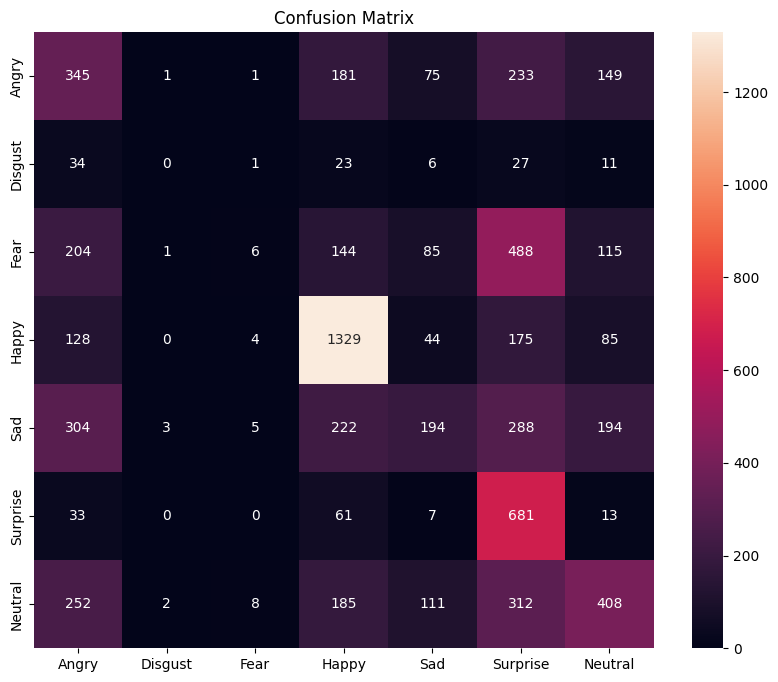

              precision    recall  f1-score   support

       Angry       0.27      0.35      0.30       985
     Disgust       0.00      0.00      0.00       102
        Fear       0.24      0.01      0.01      1043
       Happy       0.62      0.75      0.68      1765
         Sad       0.37      0.16      0.22      1210
    Surprise       0.31      0.86      0.45       795
     Neutral       0.42      0.32      0.36      1278

    accuracy                           0.41      7178
   macro avg       0.32      0.35      0.29      7178
weighted avg       0.40      0.41      0.36      7178

Epoch 1:
Train Loss: 1.8039 | Acc: 0.2966
Val Loss: 1.8676 | Acc: 0.4128


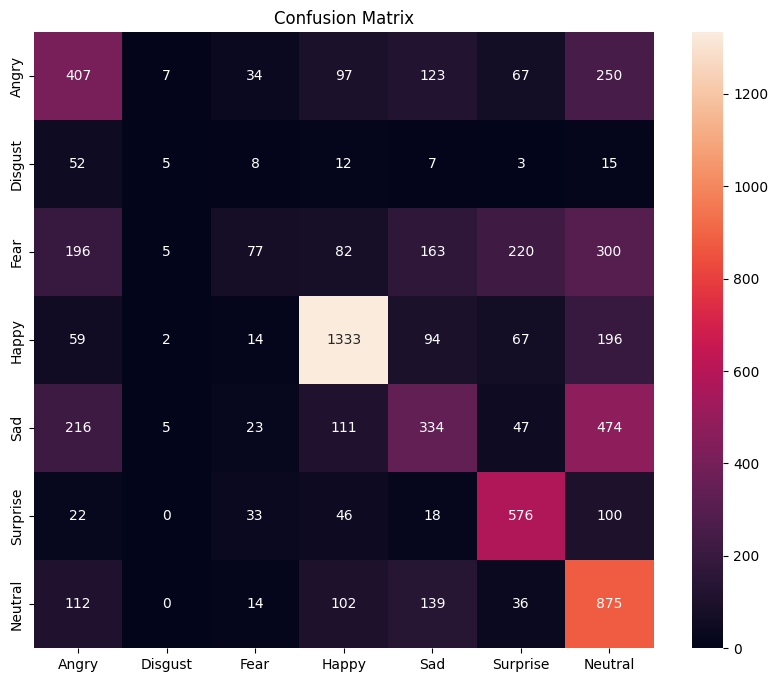

              precision    recall  f1-score   support

       Angry       0.38      0.41      0.40       985
     Disgust       0.21      0.05      0.08       102
        Fear       0.38      0.07      0.12      1043
       Happy       0.75      0.76      0.75      1765
         Sad       0.38      0.28      0.32      1210
    Surprise       0.57      0.72      0.64       795
     Neutral       0.40      0.68      0.50      1278

    accuracy                           0.50      7178
   macro avg       0.44      0.43      0.40      7178
weighted avg       0.49      0.50      0.47      7178

Epoch 2:
Train Loss: 1.6000 | Acc: 0.4125
Val Loss: 1.6509 | Acc: 0.5025


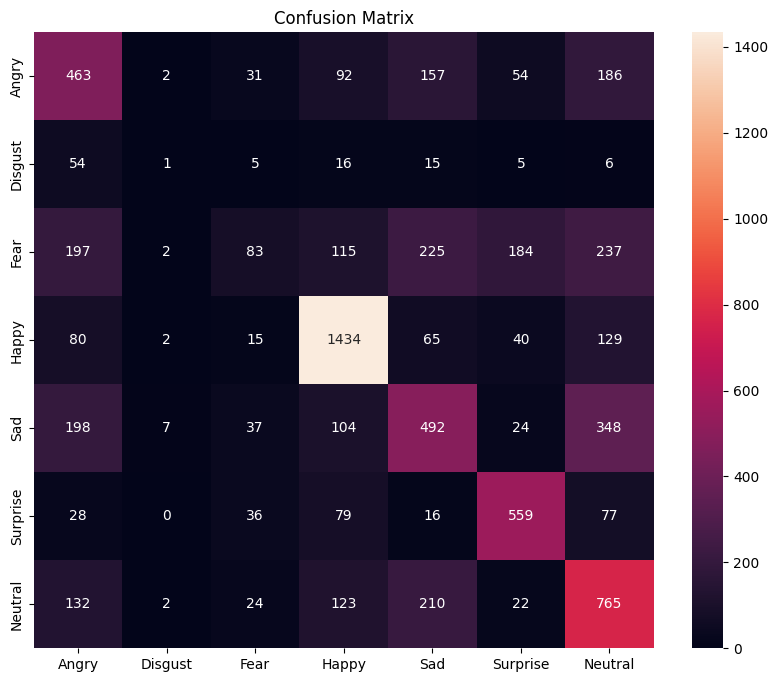

              precision    recall  f1-score   support

       Angry       0.40      0.47      0.43       985
     Disgust       0.06      0.01      0.02       102
        Fear       0.36      0.08      0.13      1043
       Happy       0.73      0.81      0.77      1765
         Sad       0.42      0.41      0.41      1210
    Surprise       0.63      0.70      0.66       795
     Neutral       0.44      0.60      0.51      1278

    accuracy                           0.53      7178
   macro avg       0.43      0.44      0.42      7178
weighted avg       0.51      0.53      0.50      7178

Epoch 3:
Train Loss: 1.5331 | Acc: 0.4514
Val Loss: 1.6142 | Acc: 0.5290


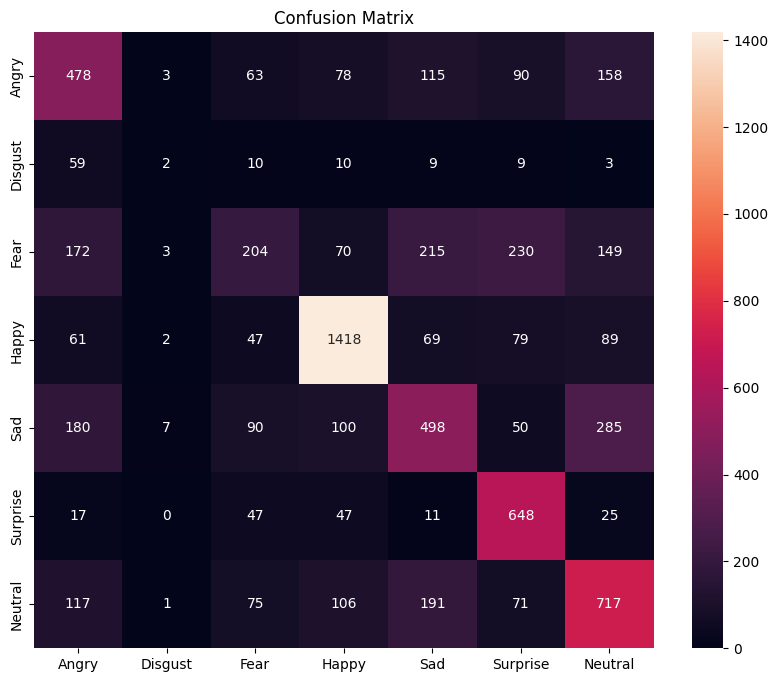

              precision    recall  f1-score   support

       Angry       0.44      0.49      0.46       985
     Disgust       0.11      0.02      0.03       102
        Fear       0.38      0.20      0.26      1043
       Happy       0.78      0.80      0.79      1765
         Sad       0.45      0.41      0.43      1210
    Surprise       0.55      0.82      0.66       795
     Neutral       0.50      0.56      0.53      1278

    accuracy                           0.55      7178
   macro avg       0.46      0.47      0.45      7178
weighted avg       0.53      0.55      0.54      7178

Epoch 4:
Train Loss: 1.4958 | Acc: 0.4752
Val Loss: 1.5640 | Acc: 0.5524


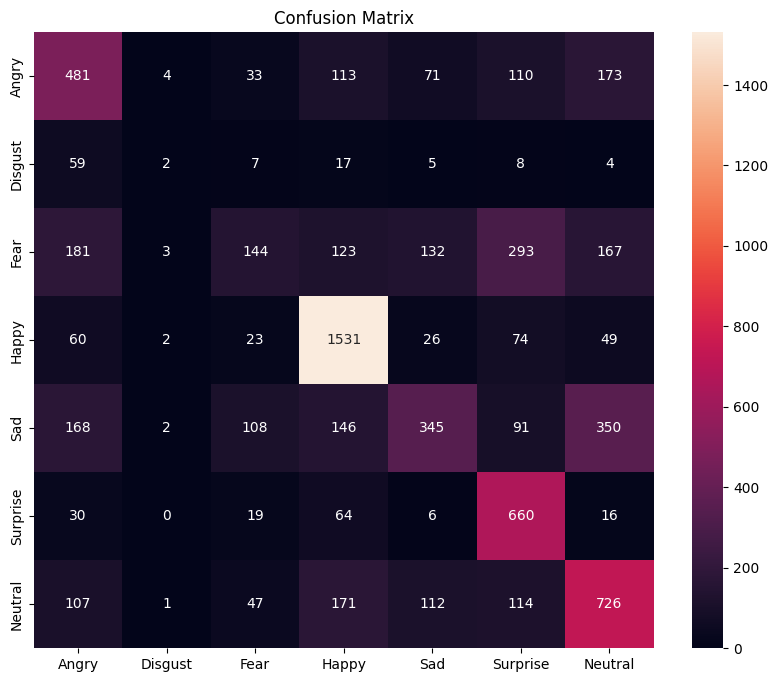

              precision    recall  f1-score   support

       Angry       0.44      0.49      0.46       985
     Disgust       0.14      0.02      0.03       102
        Fear       0.38      0.14      0.20      1043
       Happy       0.71      0.87      0.78      1765
         Sad       0.49      0.29      0.36      1210
    Surprise       0.49      0.83      0.62       795
     Neutral       0.49      0.57      0.53      1278

    accuracy                           0.54      7178
   macro avg       0.45      0.46      0.43      7178
weighted avg       0.52      0.54      0.51      7178

Epoch 5:
Train Loss: 1.4707 | Acc: 0.4882
Val Loss: 1.6880 | Acc: 0.5418


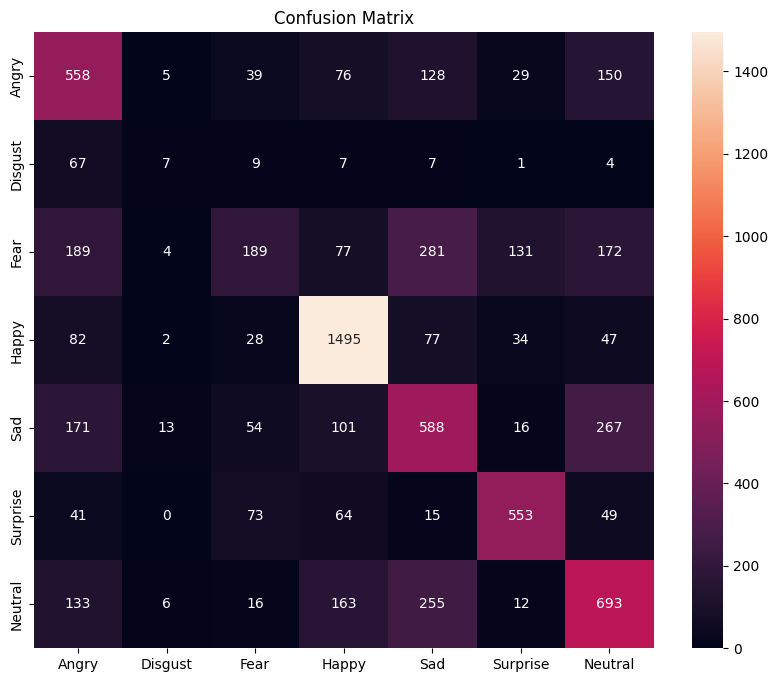

              precision    recall  f1-score   support

       Angry       0.45      0.57      0.50       985
     Disgust       0.19      0.07      0.10       102
        Fear       0.46      0.18      0.26      1043
       Happy       0.75      0.85      0.80      1765
         Sad       0.44      0.49      0.46      1210
    Surprise       0.71      0.70      0.70       795
     Neutral       0.50      0.54      0.52      1278

    accuracy                           0.57      7178
   macro avg       0.50      0.48      0.48      7178
weighted avg       0.56      0.57      0.55      7178

Epoch 6:
Train Loss: 1.4464 | Acc: 0.5022
Val Loss: 1.5910 | Acc: 0.5688


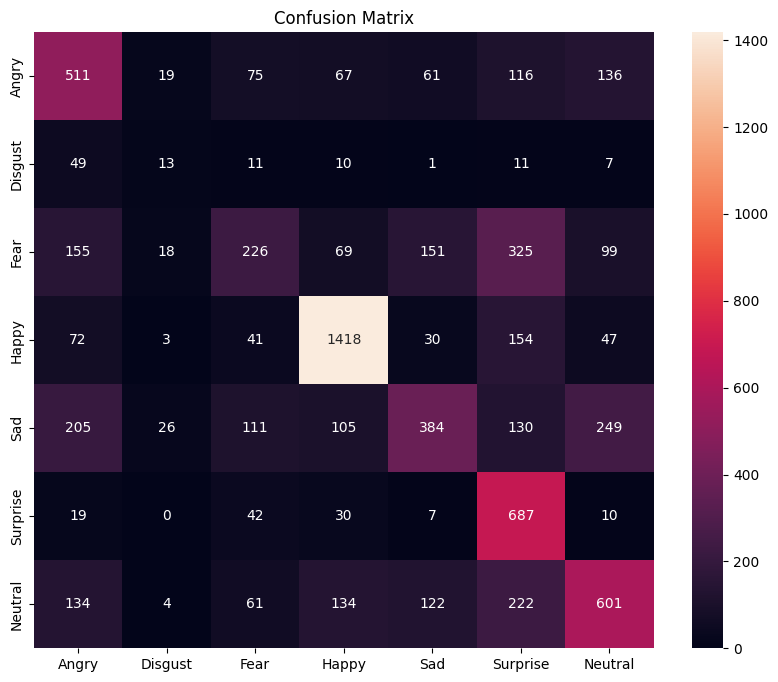

              precision    recall  f1-score   support

       Angry       0.45      0.52      0.48       985
     Disgust       0.16      0.13      0.14       102
        Fear       0.40      0.22      0.28      1043
       Happy       0.77      0.80      0.79      1765
         Sad       0.51      0.32      0.39      1210
    Surprise       0.42      0.86      0.56       795
     Neutral       0.52      0.47      0.50      1278

    accuracy                           0.53      7178
   macro avg       0.46      0.47      0.45      7178
weighted avg       0.54      0.53      0.52      7178

Epoch 7:
Train Loss: 1.4296 | Acc: 0.5090
Val Loss: 1.7126 | Acc: 0.5350


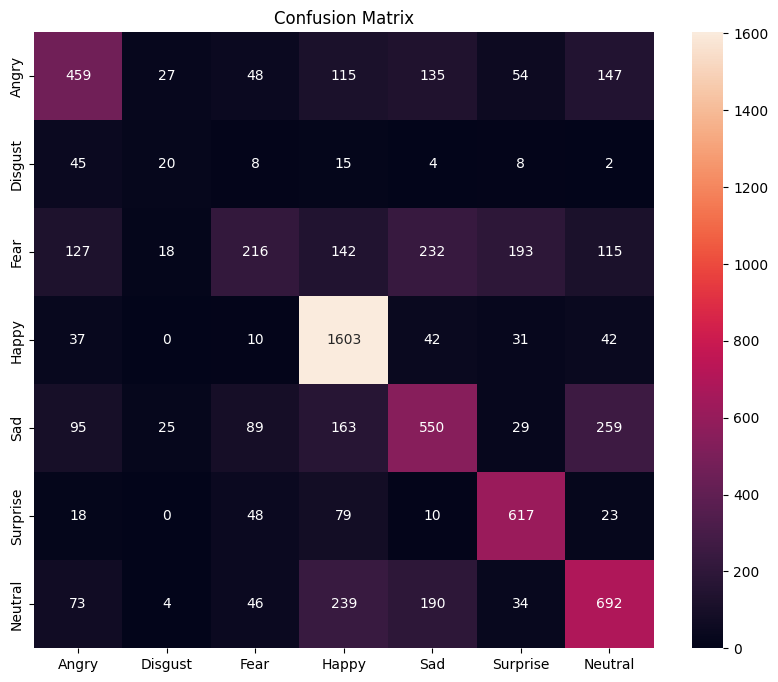

              precision    recall  f1-score   support

       Angry       0.54      0.47      0.50       985
     Disgust       0.21      0.20      0.20       102
        Fear       0.46      0.21      0.29      1043
       Happy       0.68      0.91      0.78      1765
         Sad       0.47      0.45      0.46      1210
    Surprise       0.64      0.78      0.70       795
     Neutral       0.54      0.54      0.54      1278

    accuracy                           0.58      7178
   macro avg       0.51      0.51      0.50      7178
weighted avg       0.56      0.58      0.56      7178

Epoch 8:
Train Loss: 1.4133 | Acc: 0.5205
Val Loss: 1.5910 | Acc: 0.5791


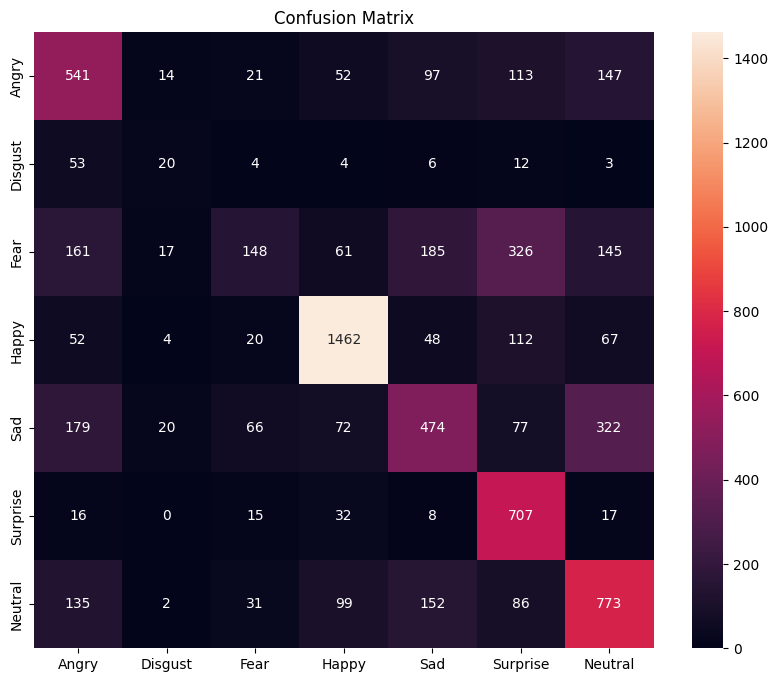

              precision    recall  f1-score   support

       Angry       0.48      0.55      0.51       985
     Disgust       0.26      0.20      0.22       102
        Fear       0.49      0.14      0.22      1043
       Happy       0.82      0.83      0.82      1765
         Sad       0.49      0.39      0.43      1210
    Surprise       0.49      0.89      0.63       795
     Neutral       0.52      0.60      0.56      1278

    accuracy                           0.57      7178
   macro avg       0.51      0.51      0.49      7178
weighted avg       0.57      0.57      0.55      7178

Epoch 9:
Train Loss: 1.3994 | Acc: 0.5280
Val Loss: 1.5858 | Acc: 0.5747


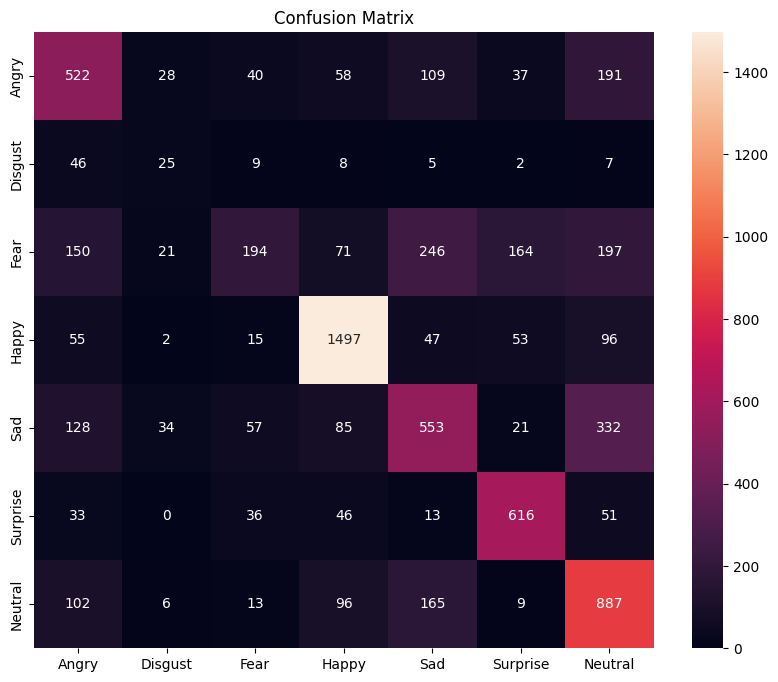

              precision    recall  f1-score   support

       Angry       0.50      0.53      0.52       985
     Disgust       0.22      0.25      0.23       102
        Fear       0.53      0.19      0.28      1043
       Happy       0.80      0.85      0.83      1765
         Sad       0.49      0.46      0.47      1210
    Surprise       0.68      0.77      0.73       795
     Neutral       0.50      0.69      0.58      1278

    accuracy                           0.60      7178
   macro avg       0.53      0.53      0.52      7178
weighted avg       0.59      0.60      0.58      7178

Epoch 10:
Train Loss: 1.3827 | Acc: 0.5360
Val Loss: 1.5156 | Acc: 0.5982


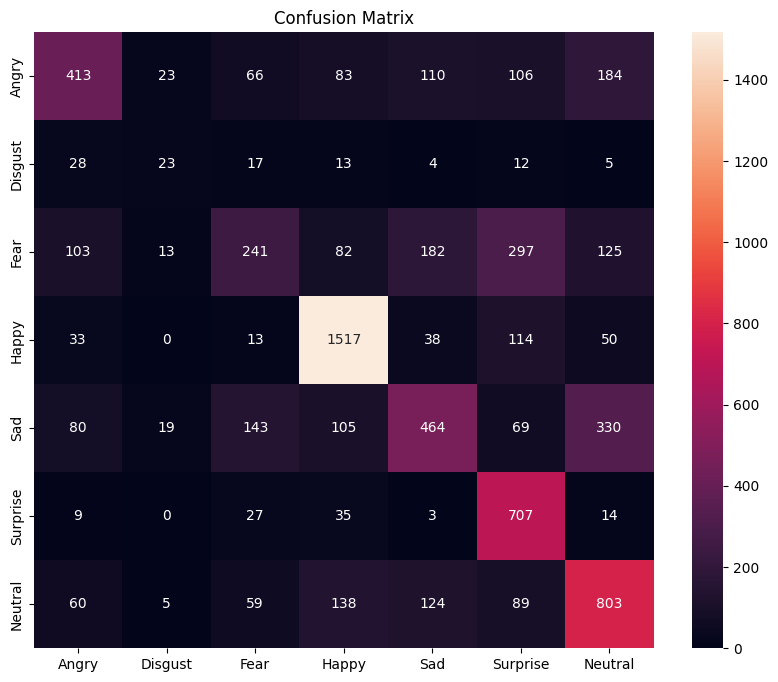

              precision    recall  f1-score   support

       Angry       0.57      0.42      0.48       985
     Disgust       0.28      0.23      0.25       102
        Fear       0.43      0.23      0.30      1043
       Happy       0.77      0.86      0.81      1765
         Sad       0.50      0.38      0.43      1210
    Surprise       0.51      0.89      0.65       795
     Neutral       0.53      0.63      0.58      1278

    accuracy                           0.58      7178
   macro avg       0.51      0.52      0.50      7178
weighted avg       0.57      0.58      0.56      7178

Epoch 11:
Train Loss: 1.3730 | Acc: 0.5407
Val Loss: 1.6431 | Acc: 0.5807


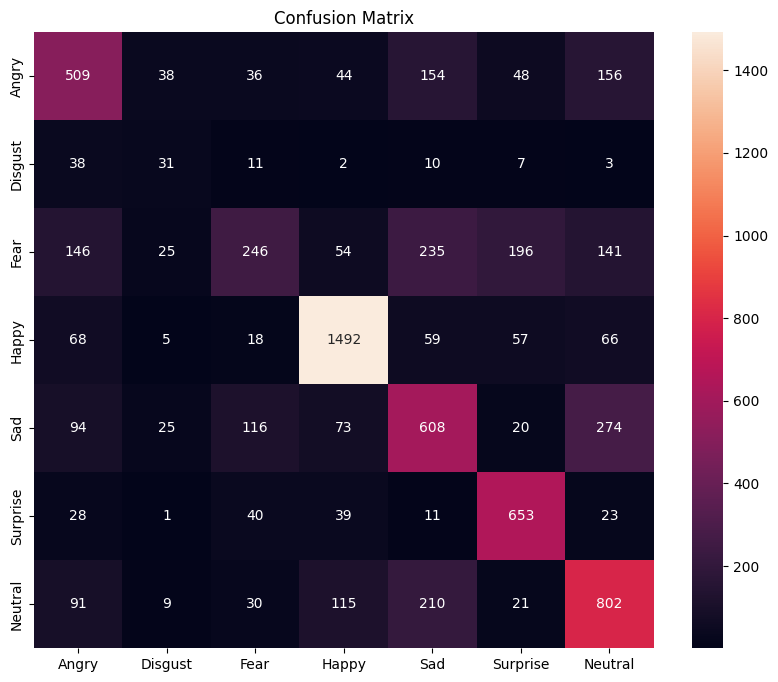

              precision    recall  f1-score   support

       Angry       0.52      0.52      0.52       985
     Disgust       0.23      0.30      0.26       102
        Fear       0.49      0.24      0.32      1043
       Happy       0.82      0.85      0.83      1765
         Sad       0.47      0.50      0.49      1210
    Surprise       0.65      0.82      0.73       795
     Neutral       0.55      0.63      0.58      1278

    accuracy                           0.60      7178
   macro avg       0.53      0.55      0.53      7178
weighted avg       0.60      0.60      0.59      7178

Epoch 12:
Train Loss: 1.3668 | Acc: 0.5445
Val Loss: 1.4459 | Acc: 0.6048


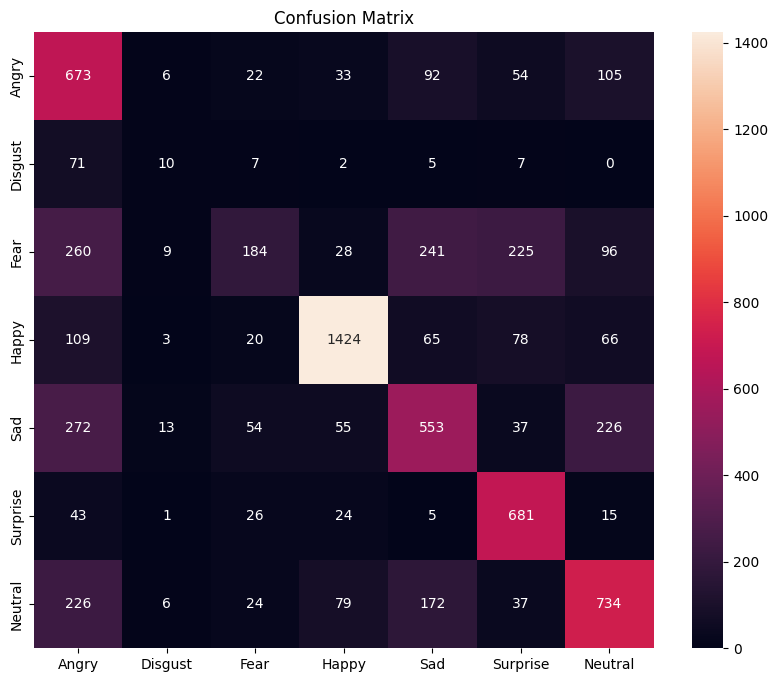

              precision    recall  f1-score   support

       Angry       0.41      0.68      0.51       985
     Disgust       0.21      0.10      0.13       102
        Fear       0.55      0.18      0.27      1043
       Happy       0.87      0.81      0.84      1765
         Sad       0.49      0.46      0.47      1210
    Surprise       0.61      0.86      0.71       795
     Neutral       0.59      0.57      0.58      1278

    accuracy                           0.59      7178
   macro avg       0.53      0.52      0.50      7178
weighted avg       0.61      0.59      0.58      7178

Epoch 13:
Train Loss: 1.3527 | Acc: 0.5553
Val Loss: 1.5139 | Acc: 0.5933


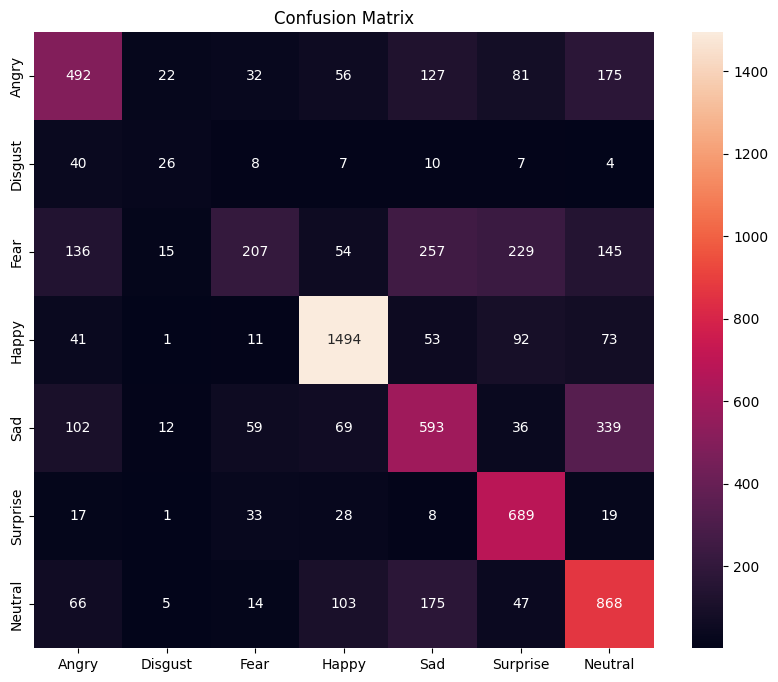

              precision    recall  f1-score   support

       Angry       0.55      0.50      0.52       985
     Disgust       0.32      0.25      0.28       102
        Fear       0.57      0.20      0.29      1043
       Happy       0.82      0.85      0.84      1765
         Sad       0.48      0.49      0.49      1210
    Surprise       0.58      0.87      0.70       795
     Neutral       0.53      0.68      0.60      1278

    accuracy                           0.61      7178
   macro avg       0.55      0.55      0.53      7178
weighted avg       0.61      0.61      0.59      7178

Epoch 14:
Train Loss: 1.3438 | Acc: 0.5559
Val Loss: 1.4871 | Acc: 0.6087


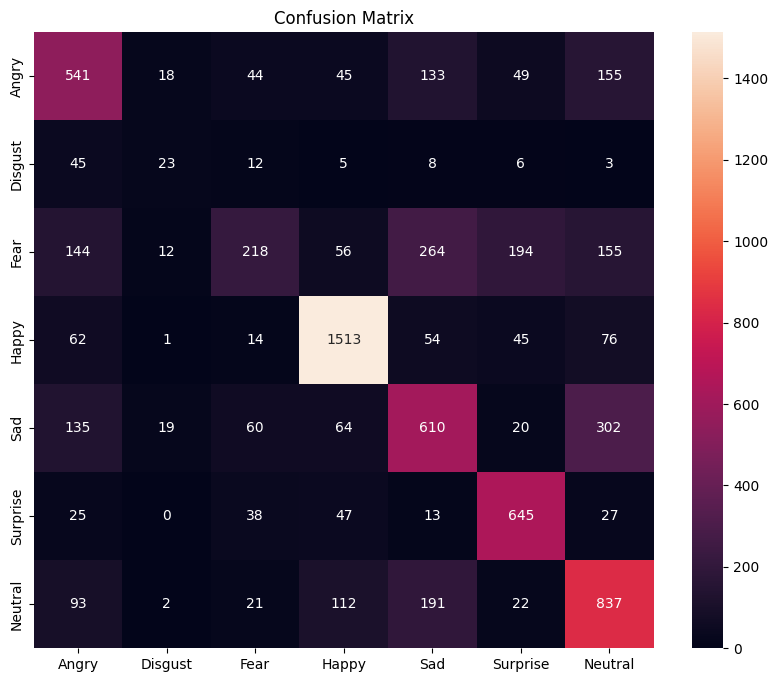

              precision    recall  f1-score   support

       Angry       0.52      0.55      0.53       985
     Disgust       0.31      0.23      0.26       102
        Fear       0.54      0.21      0.30      1043
       Happy       0.82      0.86      0.84      1765
         Sad       0.48      0.50      0.49      1210
    Surprise       0.66      0.81      0.73       795
     Neutral       0.54      0.65      0.59      1278

    accuracy                           0.61      7178
   macro avg       0.55      0.54      0.53      7178
weighted avg       0.60      0.61      0.60      7178

Epoch 15:
Train Loss: 1.3374 | Acc: 0.5605
Val Loss: 1.4681 | Acc: 0.6112


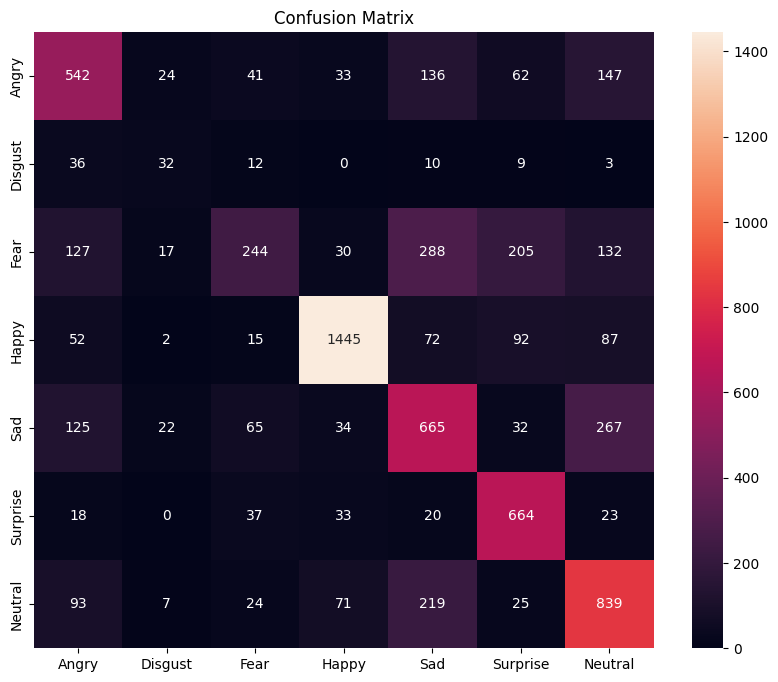

              precision    recall  f1-score   support

       Angry       0.55      0.55      0.55       985
     Disgust       0.31      0.31      0.31       102
        Fear       0.56      0.23      0.33      1043
       Happy       0.88      0.82      0.85      1765
         Sad       0.47      0.55      0.51      1210
    Surprise       0.61      0.84      0.70       795
     Neutral       0.56      0.66      0.60      1278

    accuracy                           0.62      7178
   macro avg       0.56      0.57      0.55      7178
weighted avg       0.62      0.62      0.61      7178

Epoch 16:
Train Loss: 1.3291 | Acc: 0.5661
Val Loss: 1.4603 | Acc: 0.6173


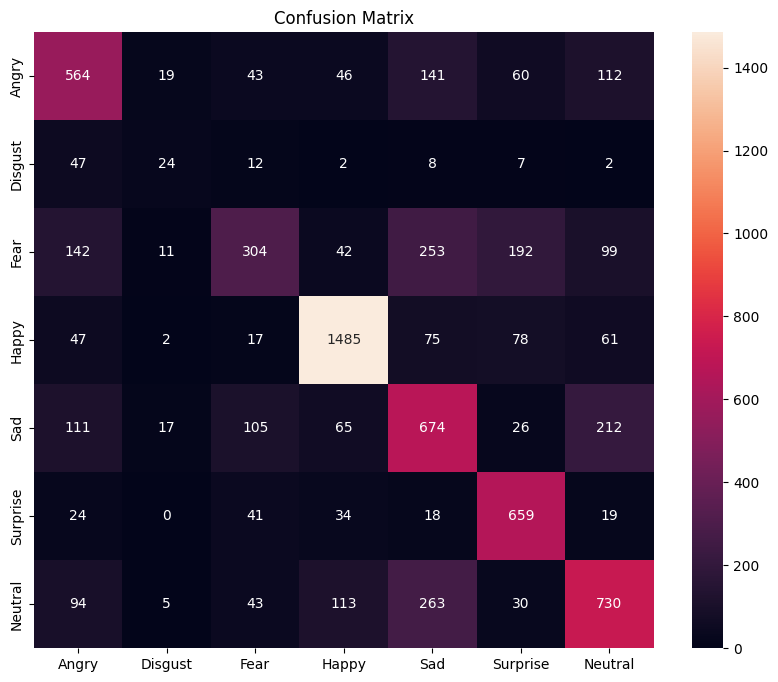

              precision    recall  f1-score   support

       Angry       0.55      0.57      0.56       985
     Disgust       0.31      0.24      0.27       102
        Fear       0.54      0.29      0.38      1043
       Happy       0.83      0.84      0.84      1765
         Sad       0.47      0.56      0.51      1210
    Surprise       0.63      0.83      0.71       795
     Neutral       0.59      0.57      0.58      1278

    accuracy                           0.62      7178
   macro avg       0.56      0.56      0.55      7178
weighted avg       0.62      0.62      0.61      7178

Epoch 17:
Train Loss: 1.3250 | Acc: 0.5690
Val Loss: 1.4640 | Acc: 0.6186


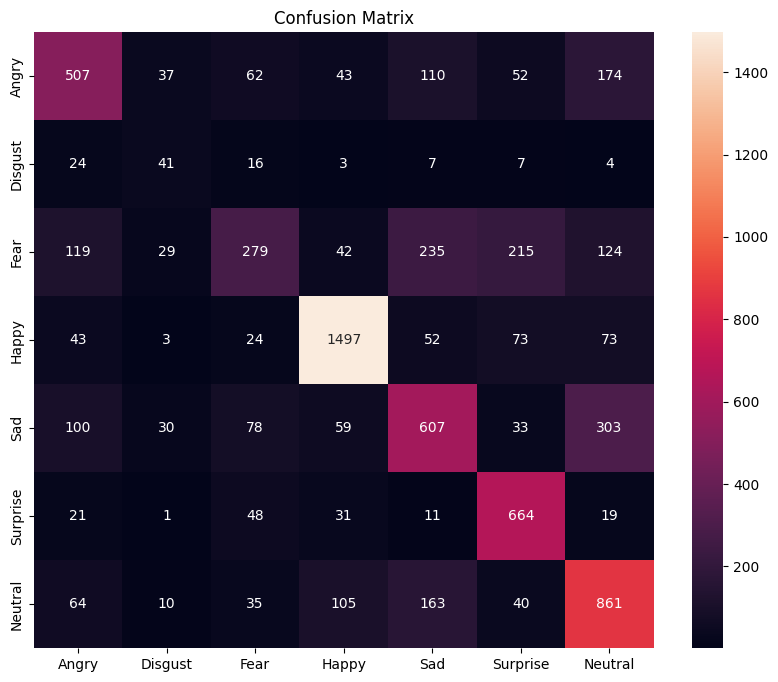

              precision    recall  f1-score   support

       Angry       0.58      0.51      0.54       985
     Disgust       0.27      0.40      0.32       102
        Fear       0.51      0.27      0.35      1043
       Happy       0.84      0.85      0.84      1765
         Sad       0.51      0.50      0.51      1210
    Surprise       0.61      0.84      0.71       795
     Neutral       0.55      0.67      0.61      1278

    accuracy                           0.62      7178
   macro avg       0.55      0.58      0.56      7178
weighted avg       0.62      0.62      0.61      7178

Epoch 18:
Train Loss: 1.3146 | Acc: 0.5729
Val Loss: 1.4662 | Acc: 0.6208


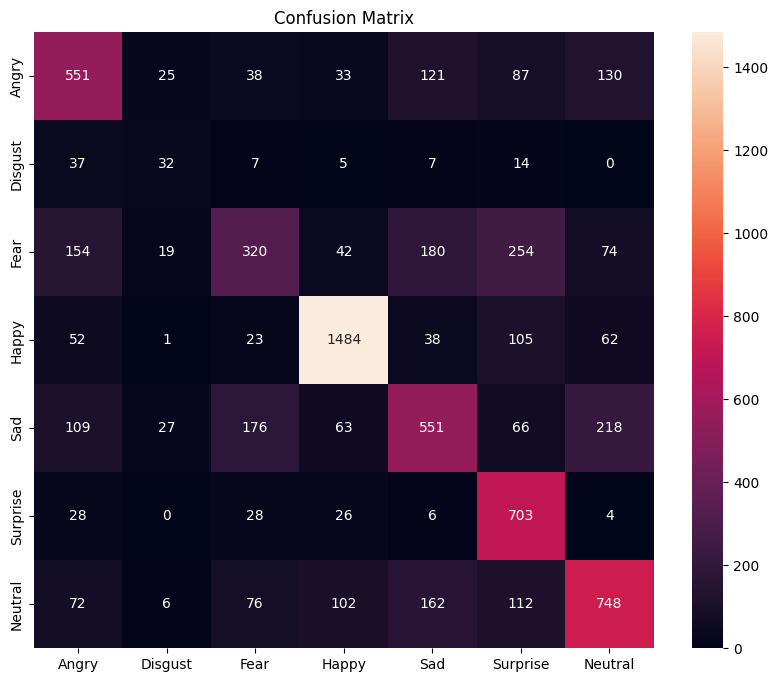

              precision    recall  f1-score   support

       Angry       0.55      0.56      0.55       985
     Disgust       0.29      0.31      0.30       102
        Fear       0.48      0.31      0.37      1043
       Happy       0.85      0.84      0.84      1765
         Sad       0.52      0.46      0.48      1210
    Surprise       0.52      0.88      0.66       795
     Neutral       0.61      0.59      0.60      1278

    accuracy                           0.61      7178
   macro avg       0.54      0.56      0.54      7178
weighted avg       0.61      0.61      0.60      7178

Epoch 19:
Train Loss: 1.3087 | Acc: 0.5755
Val Loss: 1.4702 | Acc: 0.6115


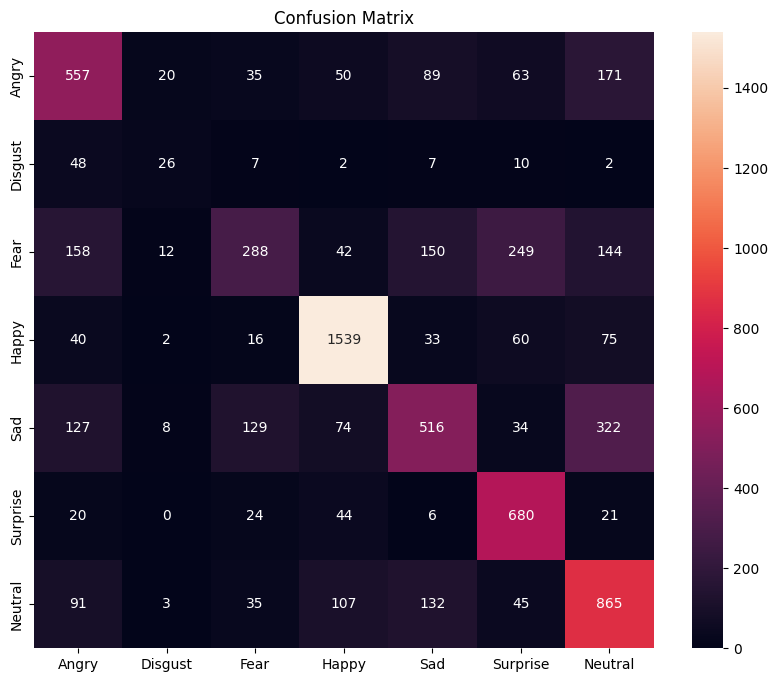

              precision    recall  f1-score   support

       Angry       0.54      0.57      0.55       985
     Disgust       0.37      0.25      0.30       102
        Fear       0.54      0.28      0.37      1043
       Happy       0.83      0.87      0.85      1765
         Sad       0.55      0.43      0.48      1210
    Surprise       0.60      0.86      0.70       795
     Neutral       0.54      0.68      0.60      1278

    accuracy                           0.62      7178
   macro avg       0.57      0.56      0.55      7178
weighted avg       0.62      0.62      0.61      7178

Epoch 20:
Train Loss: 1.3030 | Acc: 0.5796
Val Loss: 1.4695 | Acc: 0.6229


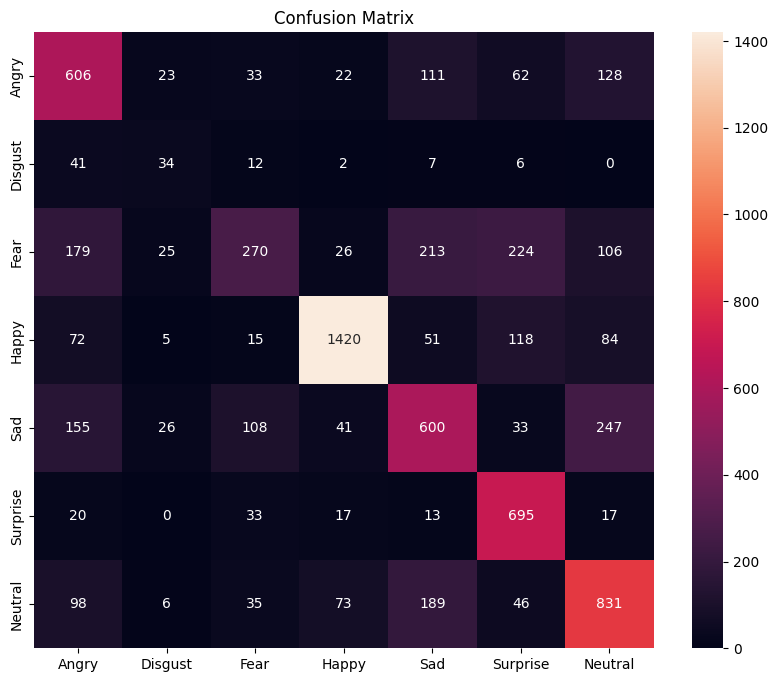

              precision    recall  f1-score   support

       Angry       0.52      0.62      0.56       985
     Disgust       0.29      0.33      0.31       102
        Fear       0.53      0.26      0.35      1043
       Happy       0.89      0.80      0.84      1765
         Sad       0.51      0.50      0.50      1210
    Surprise       0.59      0.87      0.70       795
     Neutral       0.59      0.65      0.62      1278

    accuracy                           0.62      7178
   macro avg       0.56      0.58      0.55      7178
weighted avg       0.63      0.62      0.61      7178

Epoch 21:
Train Loss: 1.3004 | Acc: 0.5807
Val Loss: 1.4424 | Acc: 0.6208


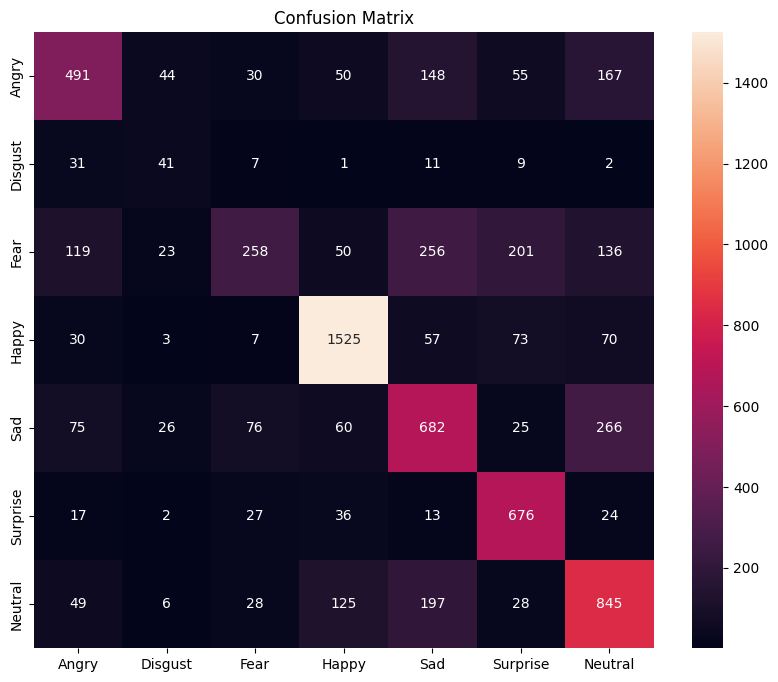

              precision    recall  f1-score   support

       Angry       0.60      0.50      0.55       985
     Disgust       0.28      0.40      0.33       102
        Fear       0.60      0.25      0.35      1043
       Happy       0.83      0.86      0.84      1765
         Sad       0.50      0.56      0.53      1210
    Surprise       0.63      0.85      0.73       795
     Neutral       0.56      0.66      0.61      1278

    accuracy                           0.63      7178
   macro avg       0.57      0.58      0.56      7178
weighted avg       0.63      0.63      0.62      7178

Epoch 22:
Train Loss: 1.2887 | Acc: 0.5851
Val Loss: 1.4065 | Acc: 0.6294


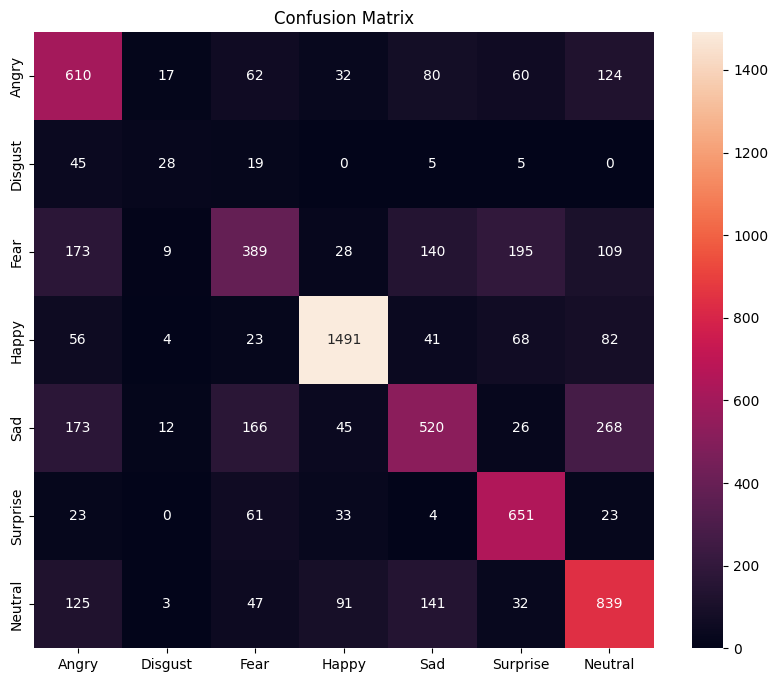

              precision    recall  f1-score   support

       Angry       0.51      0.62      0.56       985
     Disgust       0.38      0.27      0.32       102
        Fear       0.51      0.37      0.43      1043
       Happy       0.87      0.84      0.86      1765
         Sad       0.56      0.43      0.49      1210
    Surprise       0.63      0.82      0.71       795
     Neutral       0.58      0.66      0.62      1278

    accuracy                           0.63      7178
   macro avg       0.58      0.57      0.57      7178
weighted avg       0.63      0.63      0.62      7178

Epoch 23:
Train Loss: 1.2898 | Acc: 0.5853
Val Loss: 1.3871 | Acc: 0.6308


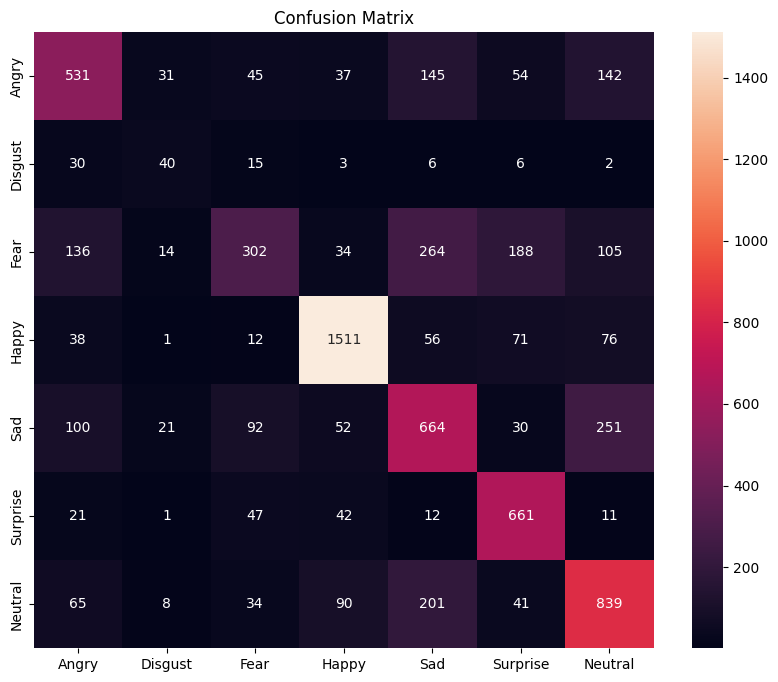

              precision    recall  f1-score   support

       Angry       0.58      0.54      0.56       985
     Disgust       0.34      0.39      0.37       102
        Fear       0.55      0.29      0.38      1043
       Happy       0.85      0.86      0.86      1765
         Sad       0.49      0.55      0.52      1210
    Surprise       0.63      0.83      0.72       795
     Neutral       0.59      0.66      0.62      1278

    accuracy                           0.63      7178
   macro avg       0.58      0.59      0.57      7178
weighted avg       0.63      0.63      0.62      7178

Epoch 24:
Train Loss: 1.2826 | Acc: 0.5902
Val Loss: 1.4075 | Acc: 0.6336


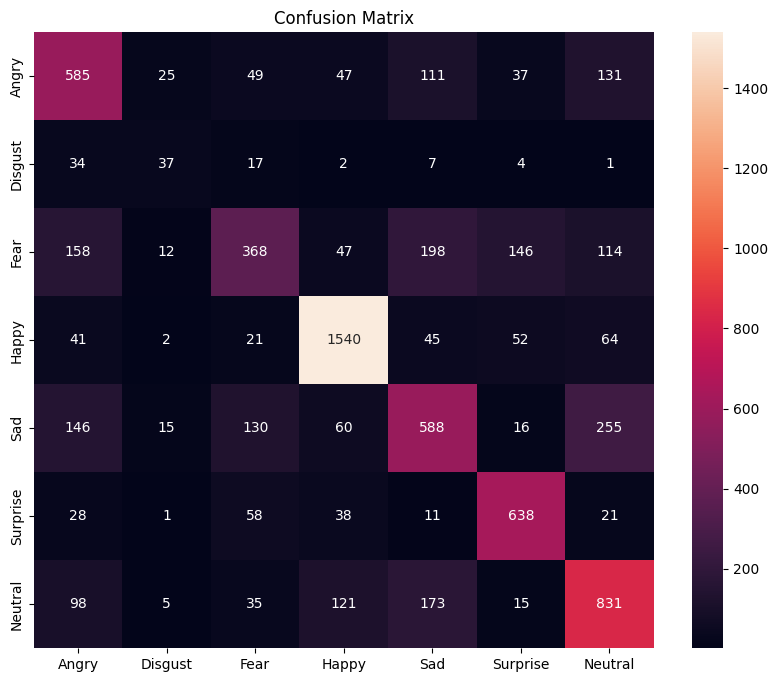

              precision    recall  f1-score   support

       Angry       0.54      0.59      0.56       985
     Disgust       0.38      0.36      0.37       102
        Fear       0.54      0.35      0.43      1043
       Happy       0.83      0.87      0.85      1765
         Sad       0.52      0.49      0.50      1210
    Surprise       0.70      0.80      0.75       795
     Neutral       0.59      0.65      0.62      1278

    accuracy                           0.64      7178
   macro avg       0.59      0.59      0.58      7178
weighted avg       0.63      0.64      0.63      7178

Epoch 25:
Train Loss: 1.2791 | Acc: 0.5904
Val Loss: 1.3780 | Acc: 0.6390


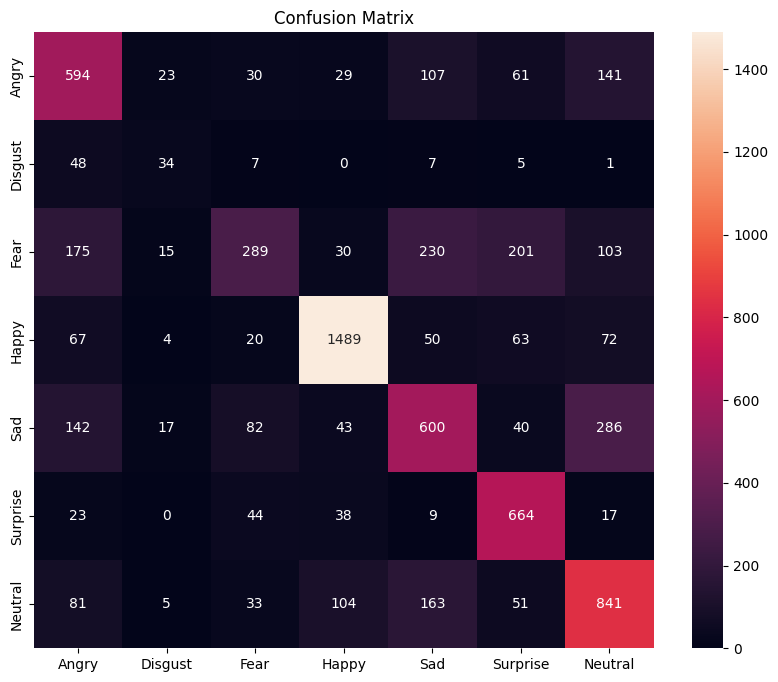

              precision    recall  f1-score   support

       Angry       0.53      0.60      0.56       985
     Disgust       0.35      0.33      0.34       102
        Fear       0.57      0.28      0.37      1043
       Happy       0.86      0.84      0.85      1765
         Sad       0.51      0.50      0.51      1210
    Surprise       0.61      0.84      0.71       795
     Neutral       0.58      0.66      0.61      1278

    accuracy                           0.63      7178
   macro avg       0.57      0.58      0.56      7178
weighted avg       0.63      0.63      0.62      7178

Epoch 26:
Train Loss: 1.2738 | Acc: 0.5969
Val Loss: 1.4119 | Acc: 0.6284


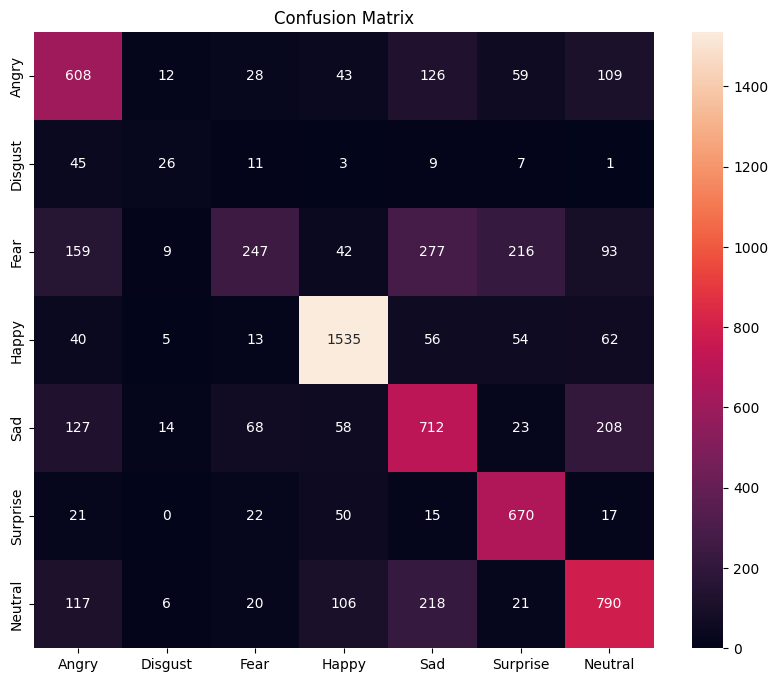

              precision    recall  f1-score   support

       Angry       0.54      0.62      0.58       985
     Disgust       0.36      0.25      0.30       102
        Fear       0.60      0.24      0.34      1043
       Happy       0.84      0.87      0.85      1765
         Sad       0.50      0.59      0.54      1210
    Surprise       0.64      0.84      0.73       795
     Neutral       0.62      0.62      0.62      1278

    accuracy                           0.64      7178
   macro avg       0.59      0.58      0.57      7178
weighted avg       0.64      0.64      0.62      7178

Epoch 27:
Train Loss: 1.2680 | Acc: 0.5959
Val Loss: 1.3670 | Acc: 0.6392


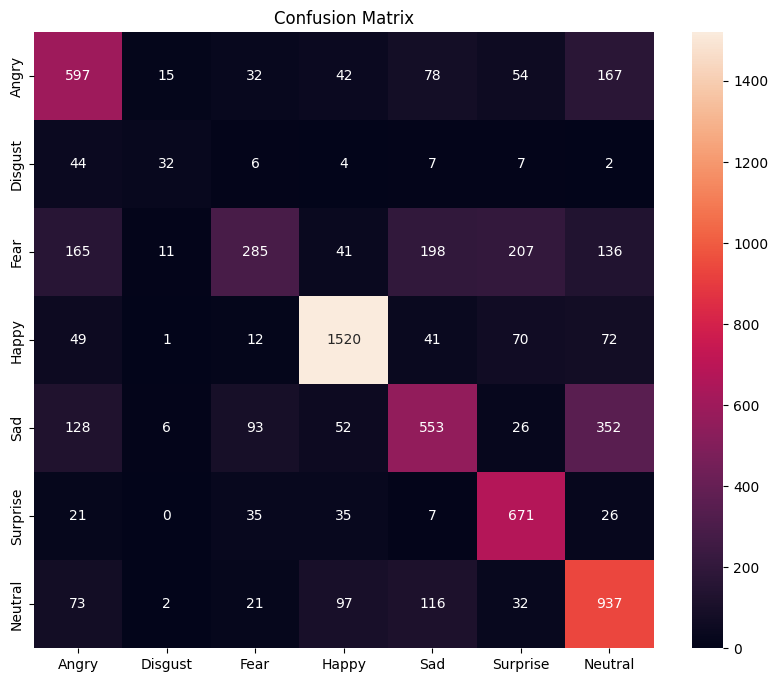

              precision    recall  f1-score   support

       Angry       0.55      0.61      0.58       985
     Disgust       0.48      0.31      0.38       102
        Fear       0.59      0.27      0.37      1043
       Happy       0.85      0.86      0.85      1765
         Sad       0.55      0.46      0.50      1210
    Surprise       0.63      0.84      0.72       795
     Neutral       0.55      0.73      0.63      1278

    accuracy                           0.64      7178
   macro avg       0.60      0.58      0.58      7178
weighted avg       0.64      0.64      0.63      7178

Epoch 28:
Train Loss: 1.2664 | Acc: 0.5989
Val Loss: 1.3659 | Acc: 0.6402


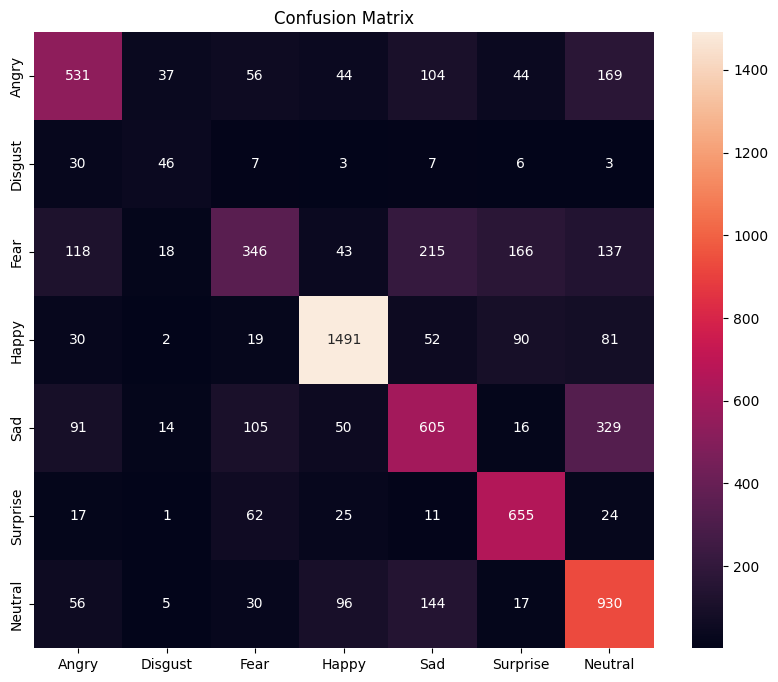

              precision    recall  f1-score   support

       Angry       0.61      0.54      0.57       985
     Disgust       0.37      0.45      0.41       102
        Fear       0.55      0.33      0.41      1043
       Happy       0.85      0.84      0.85      1765
         Sad       0.53      0.50      0.52      1210
    Surprise       0.66      0.82      0.73       795
     Neutral       0.56      0.73      0.63      1278

    accuracy                           0.64      7178
   macro avg       0.59      0.60      0.59      7178
weighted avg       0.64      0.64      0.63      7178

Epoch 29:
Train Loss: 1.2601 | Acc: 0.6018
Val Loss: 1.3539 | Acc: 0.6414


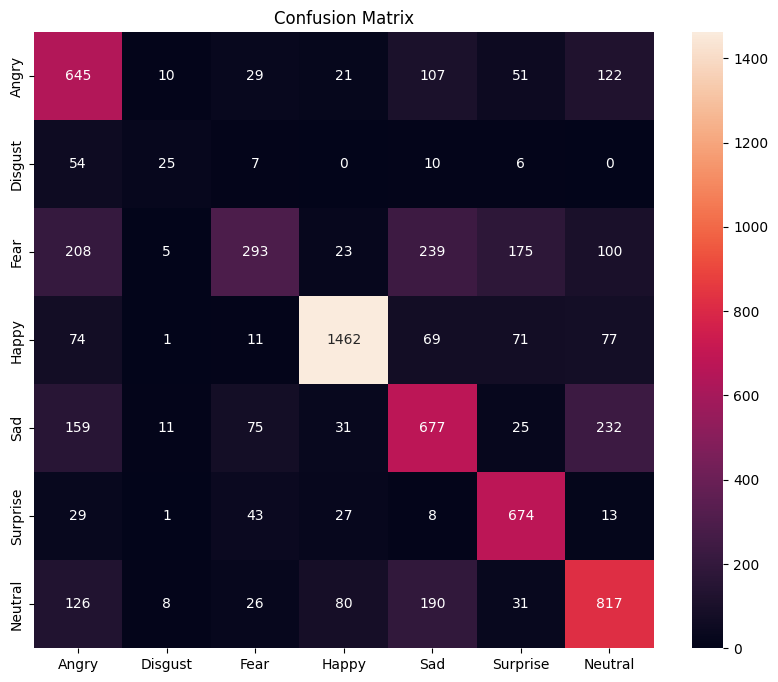

              precision    recall  f1-score   support

       Angry       0.50      0.65      0.57       985
     Disgust       0.41      0.25      0.31       102
        Fear       0.61      0.28      0.38      1043
       Happy       0.89      0.83      0.86      1765
         Sad       0.52      0.56      0.54      1210
    Surprise       0.65      0.85      0.74       795
     Neutral       0.60      0.64      0.62      1278

    accuracy                           0.64      7178
   macro avg       0.60      0.58      0.57      7178
weighted avg       0.65      0.64      0.63      7178

Epoch 30:
Train Loss: 1.2507 | Acc: 0.6067
Val Loss: 1.3800 | Acc: 0.6399


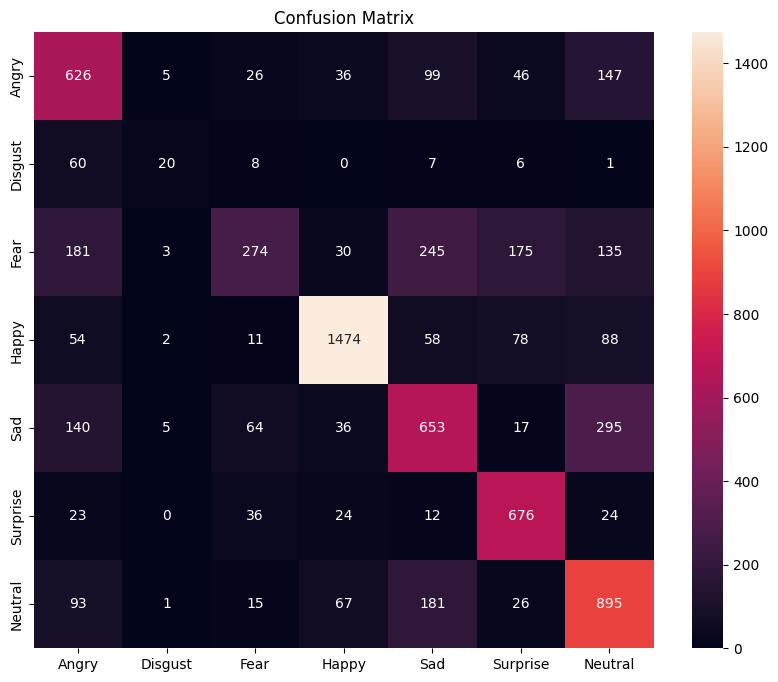

              precision    recall  f1-score   support

       Angry       0.53      0.64      0.58       985
     Disgust       0.56      0.20      0.29       102
        Fear       0.63      0.26      0.37      1043
       Happy       0.88      0.84      0.86      1765
         Sad       0.52      0.54      0.53      1210
    Surprise       0.66      0.85      0.74       795
     Neutral       0.56      0.70      0.63      1278

    accuracy                           0.64      7178
   macro avg       0.62      0.57      0.57      7178
weighted avg       0.65      0.64      0.63      7178

Epoch 31:
Train Loss: 1.2579 | Acc: 0.6033
Val Loss: 1.3896 | Acc: 0.6434


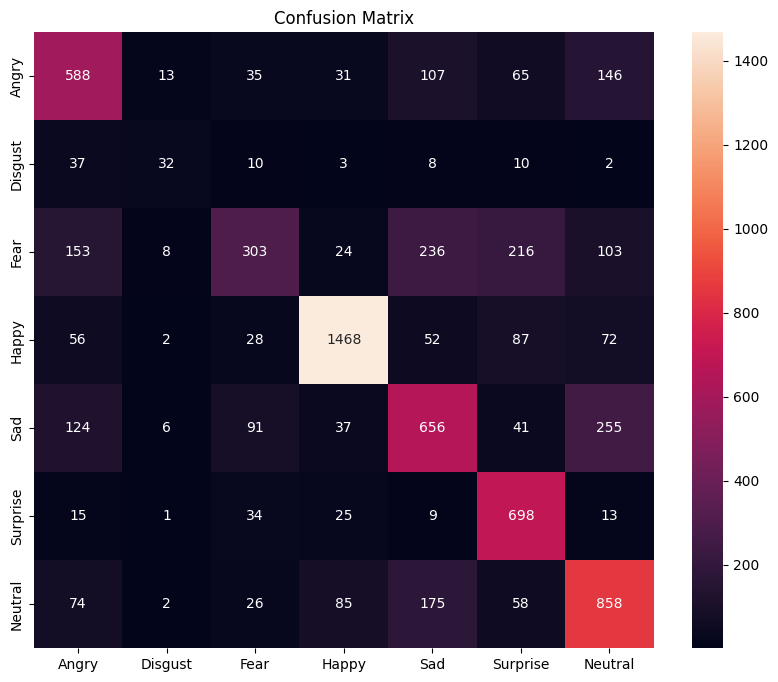

              precision    recall  f1-score   support

       Angry       0.56      0.60      0.58       985
     Disgust       0.50      0.31      0.39       102
        Fear       0.57      0.29      0.39      1043
       Happy       0.88      0.83      0.85      1765
         Sad       0.53      0.54      0.53      1210
    Surprise       0.59      0.88      0.71       795
     Neutral       0.59      0.67      0.63      1278

    accuracy                           0.64      7178
   macro avg       0.60      0.59      0.58      7178
weighted avg       0.64      0.64      0.63      7178

Epoch 32:
Train Loss: 1.2531 | Acc: 0.6026
Val Loss: 1.3535 | Acc: 0.6413


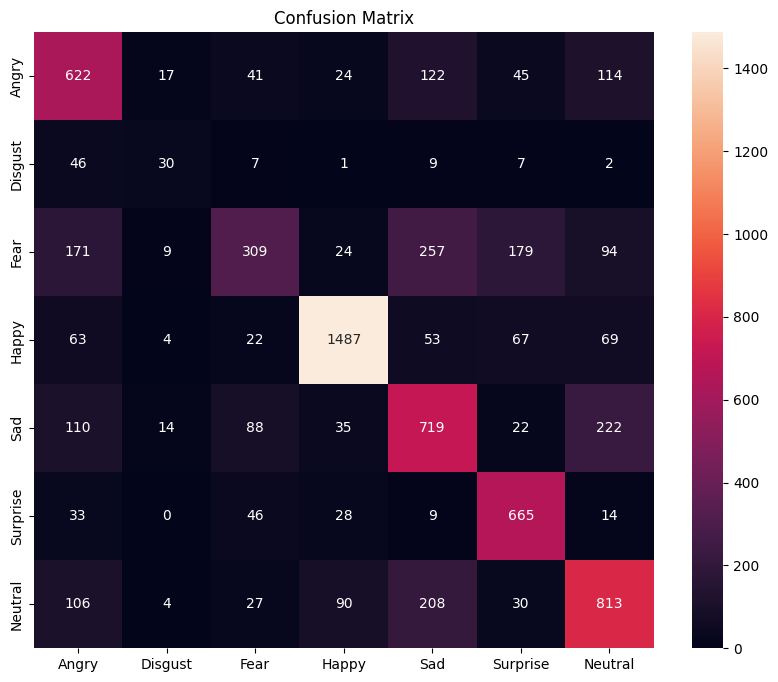

              precision    recall  f1-score   support

       Angry       0.54      0.63      0.58       985
     Disgust       0.38      0.29      0.33       102
        Fear       0.57      0.30      0.39      1043
       Happy       0.88      0.84      0.86      1765
         Sad       0.52      0.59      0.56      1210
    Surprise       0.66      0.84      0.73       795
     Neutral       0.61      0.64      0.62      1278

    accuracy                           0.65      7178
   macro avg       0.60      0.59      0.58      7178
weighted avg       0.65      0.65      0.64      7178

Epoch 33:
Train Loss: 1.2459 | Acc: 0.6066
Val Loss: 1.3502 | Acc: 0.6471


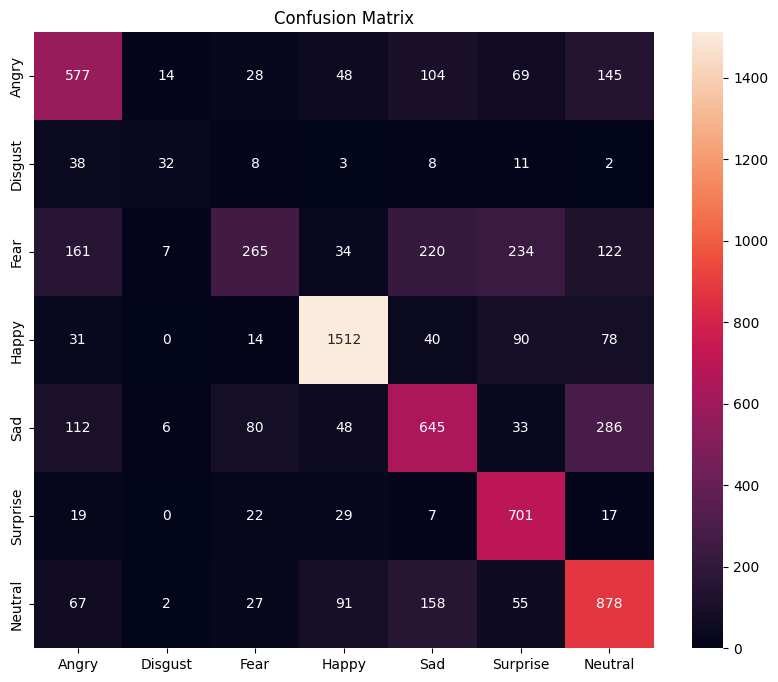

              precision    recall  f1-score   support

       Angry       0.57      0.59      0.58       985
     Disgust       0.52      0.31      0.39       102
        Fear       0.60      0.25      0.36      1043
       Happy       0.86      0.86      0.86      1765
         Sad       0.55      0.53      0.54      1210
    Surprise       0.59      0.88      0.71       795
     Neutral       0.57      0.69      0.63      1278

    accuracy                           0.64      7178
   macro avg       0.61      0.59      0.58      7178
weighted avg       0.64      0.64      0.63      7178

Epoch 34:
Train Loss: 1.2407 | Acc: 0.6092
Val Loss: 1.4148 | Acc: 0.6422


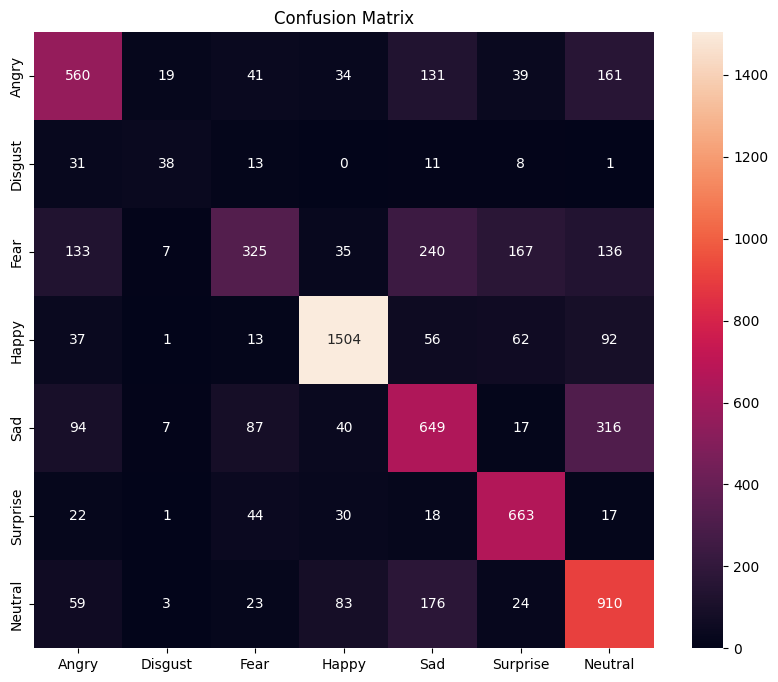

              precision    recall  f1-score   support

       Angry       0.60      0.57      0.58       985
     Disgust       0.50      0.37      0.43       102
        Fear       0.60      0.31      0.41      1043
       Happy       0.87      0.85      0.86      1765
         Sad       0.51      0.54      0.52      1210
    Surprise       0.68      0.83      0.75       795
     Neutral       0.56      0.71      0.63      1278

    accuracy                           0.65      7178
   macro avg       0.62      0.60      0.60      7178
weighted avg       0.65      0.65      0.64      7178

Epoch 35:
Train Loss: 1.2402 | Acc: 0.6120
Val Loss: 1.3171 | Acc: 0.6477


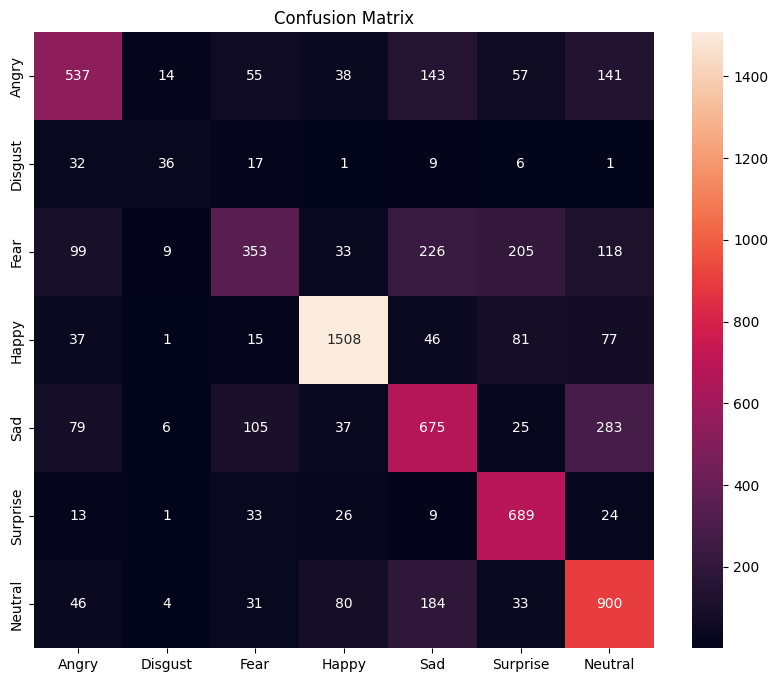

              precision    recall  f1-score   support

       Angry       0.64      0.55      0.59       985
     Disgust       0.51      0.35      0.42       102
        Fear       0.58      0.34      0.43      1043
       Happy       0.88      0.85      0.86      1765
         Sad       0.52      0.56      0.54      1210
    Surprise       0.63      0.87      0.73       795
     Neutral       0.58      0.70      0.64      1278

    accuracy                           0.65      7178
   macro avg       0.62      0.60      0.60      7178
weighted avg       0.66      0.65      0.65      7178

Epoch 36:
Train Loss: 1.2365 | Acc: 0.6119
Val Loss: 1.3256 | Acc: 0.6545


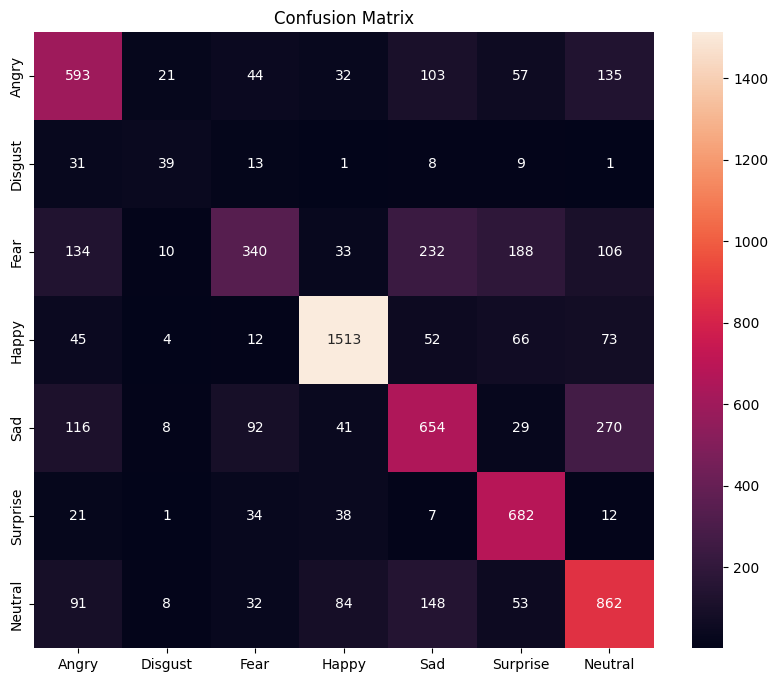

              precision    recall  f1-score   support

       Angry       0.58      0.60      0.59       985
     Disgust       0.43      0.38      0.40       102
        Fear       0.60      0.33      0.42      1043
       Happy       0.87      0.86      0.86      1765
         Sad       0.54      0.54      0.54      1210
    Surprise       0.63      0.86      0.73       795
     Neutral       0.59      0.67      0.63      1278

    accuracy                           0.65      7178
   macro avg       0.61      0.61      0.60      7178
weighted avg       0.65      0.65      0.64      7178

Epoch 37:
Train Loss: 1.2318 | Acc: 0.6169
Val Loss: 1.3411 | Acc: 0.6524


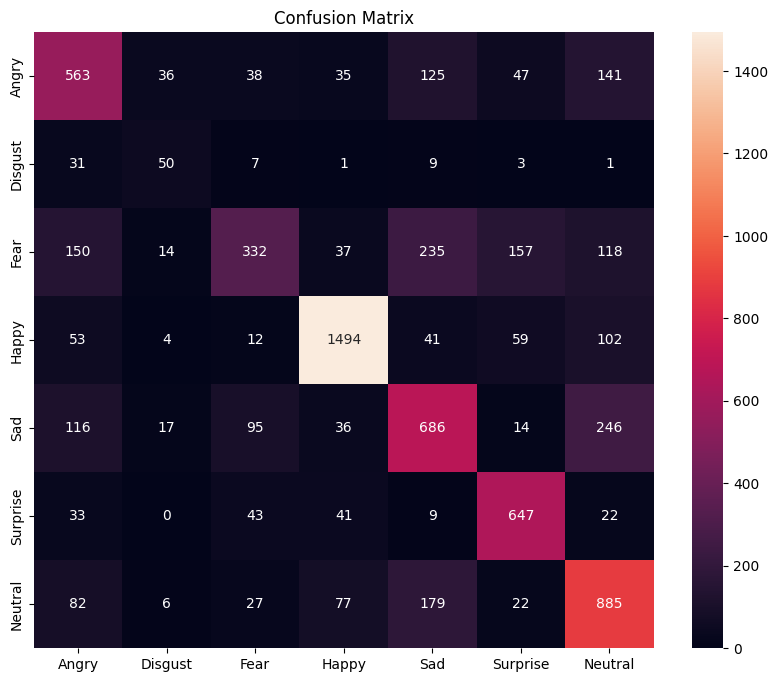

              precision    recall  f1-score   support

       Angry       0.55      0.57      0.56       985
     Disgust       0.39      0.49      0.44       102
        Fear       0.60      0.32      0.42      1043
       Happy       0.87      0.85      0.86      1765
         Sad       0.53      0.57      0.55      1210
    Surprise       0.68      0.81      0.74       795
     Neutral       0.58      0.69      0.63      1278

    accuracy                           0.65      7178
   macro avg       0.60      0.61      0.60      7178
weighted avg       0.65      0.65      0.64      7178

Epoch 38:
Train Loss: 1.2282 | Acc: 0.6169
Val Loss: 1.3042 | Acc: 0.6488


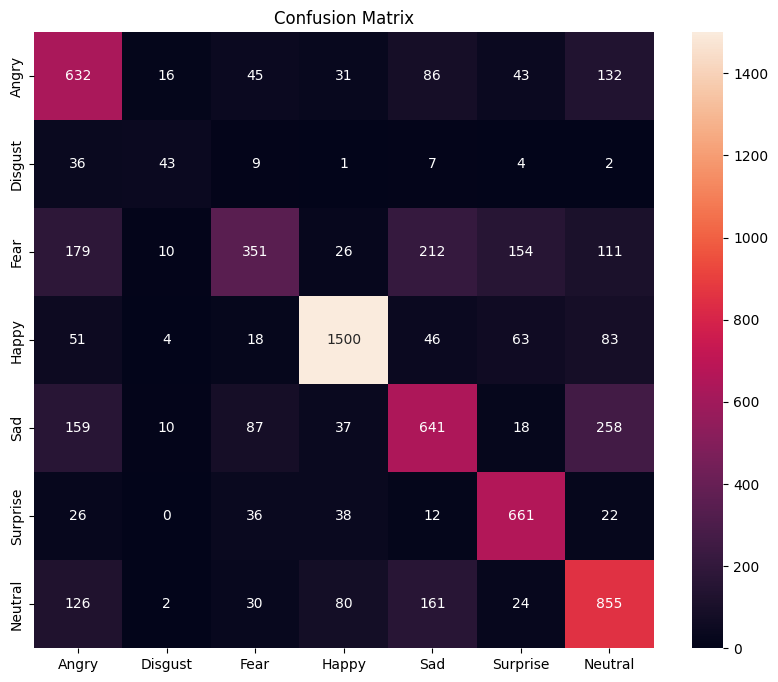

              precision    recall  f1-score   support

       Angry       0.52      0.64      0.58       985
     Disgust       0.51      0.42      0.46       102
        Fear       0.61      0.34      0.43      1043
       Happy       0.88      0.85      0.86      1765
         Sad       0.55      0.53      0.54      1210
    Surprise       0.68      0.83      0.75       795
     Neutral       0.58      0.67      0.62      1278

    accuracy                           0.65      7178
   macro avg       0.62      0.61      0.61      7178
weighted avg       0.66      0.65      0.65      7178

Epoch 39:
Train Loss: 1.2279 | Acc: 0.6184
Val Loss: 1.3021 | Acc: 0.6524


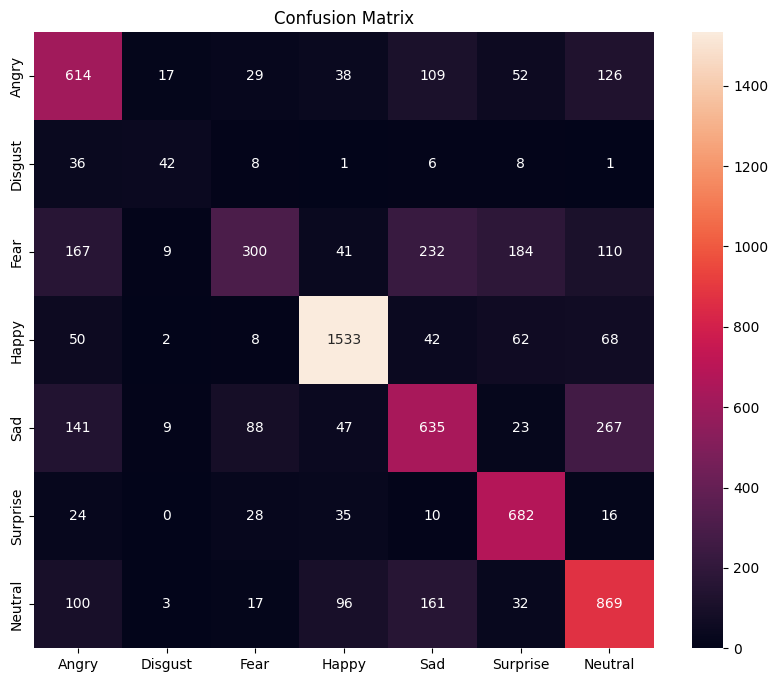

              precision    recall  f1-score   support

       Angry       0.54      0.62      0.58       985
     Disgust       0.51      0.41      0.46       102
        Fear       0.63      0.29      0.39      1043
       Happy       0.86      0.87      0.86      1765
         Sad       0.53      0.52      0.53      1210
    Surprise       0.65      0.86      0.74       795
     Neutral       0.60      0.68      0.64      1278

    accuracy                           0.65      7178
   macro avg       0.62      0.61      0.60      7178
weighted avg       0.65      0.65      0.64      7178

Epoch 40:
Train Loss: 1.2249 | Acc: 0.6186
Val Loss: 1.3315 | Acc: 0.6513


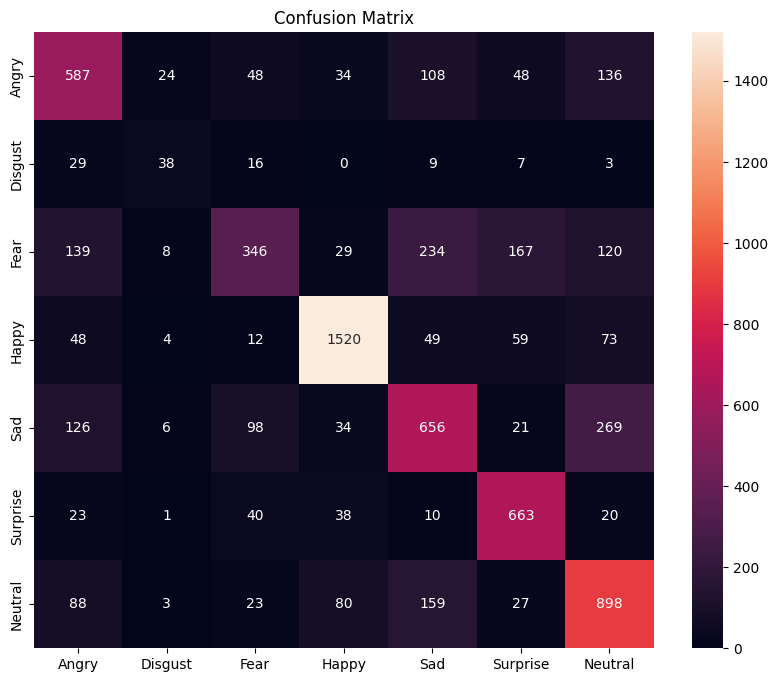

              precision    recall  f1-score   support

       Angry       0.56      0.60      0.58       985
     Disgust       0.45      0.37      0.41       102
        Fear       0.59      0.33      0.43      1043
       Happy       0.88      0.86      0.87      1765
         Sad       0.54      0.54      0.54      1210
    Surprise       0.67      0.83      0.74       795
     Neutral       0.59      0.70      0.64      1278

    accuracy                           0.66      7178
   macro avg       0.61      0.61      0.60      7178
weighted avg       0.66      0.66      0.65      7178

Epoch 41:
Train Loss: 1.2075 | Acc: 0.6265
Val Loss: 1.3060 | Acc: 0.6559


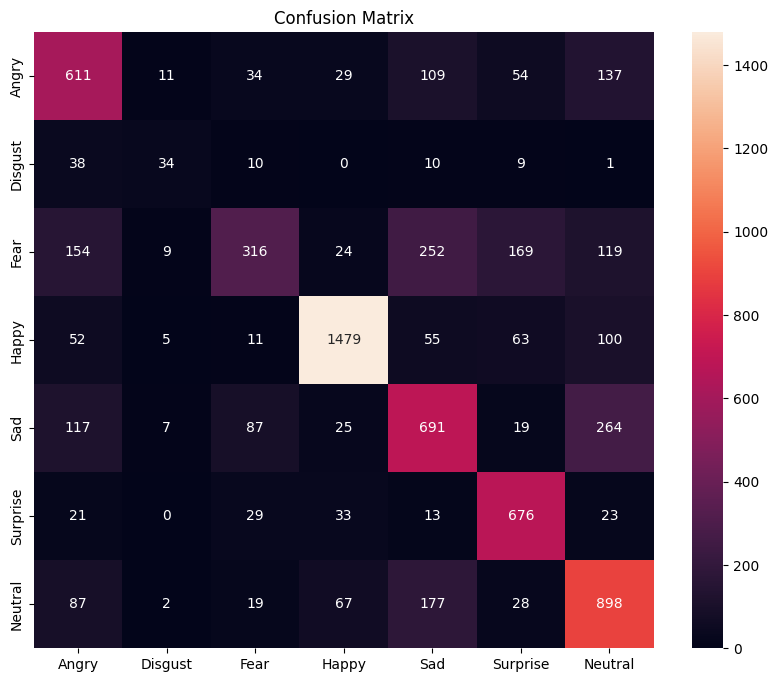

              precision    recall  f1-score   support

       Angry       0.57      0.62      0.59       985
     Disgust       0.50      0.33      0.40       102
        Fear       0.62      0.30      0.41      1043
       Happy       0.89      0.84      0.86      1765
         Sad       0.53      0.57      0.55      1210
    Surprise       0.66      0.85      0.75       795
     Neutral       0.58      0.70      0.64      1278

    accuracy                           0.66      7178
   macro avg       0.62      0.60      0.60      7178
weighted avg       0.66      0.66      0.65      7178

Epoch 42:
Train Loss: 1.2046 | Acc: 0.6280
Val Loss: 1.3025 | Acc: 0.6555


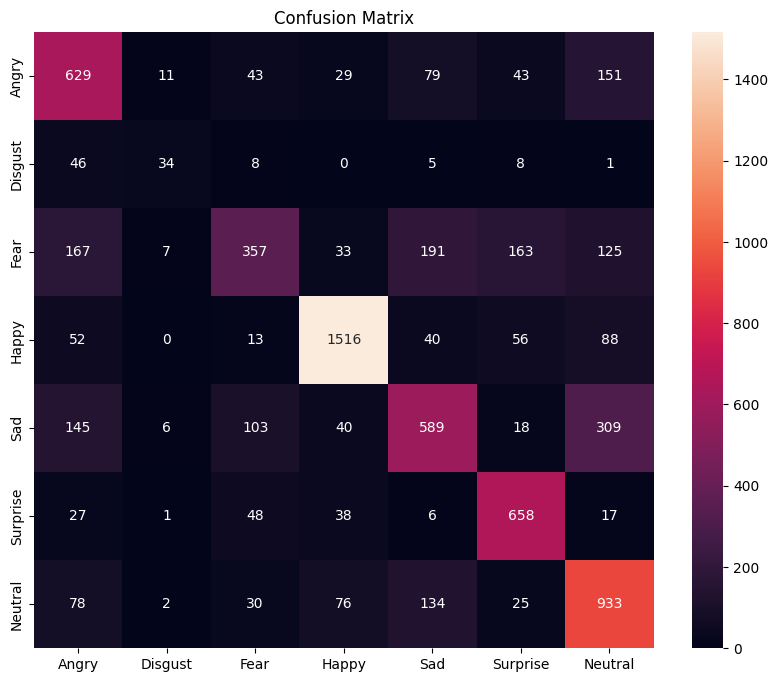

              precision    recall  f1-score   support

       Angry       0.55      0.64      0.59       985
     Disgust       0.56      0.33      0.42       102
        Fear       0.59      0.34      0.43      1043
       Happy       0.88      0.86      0.87      1765
         Sad       0.56      0.49      0.52      1210
    Surprise       0.68      0.83      0.75       795
     Neutral       0.57      0.73      0.64      1278

    accuracy                           0.66      7178
   macro avg       0.63      0.60      0.60      7178
weighted avg       0.66      0.66      0.65      7178

Epoch 43:
Train Loss: 1.1996 | Acc: 0.6295
Val Loss: 1.2971 | Acc: 0.6570


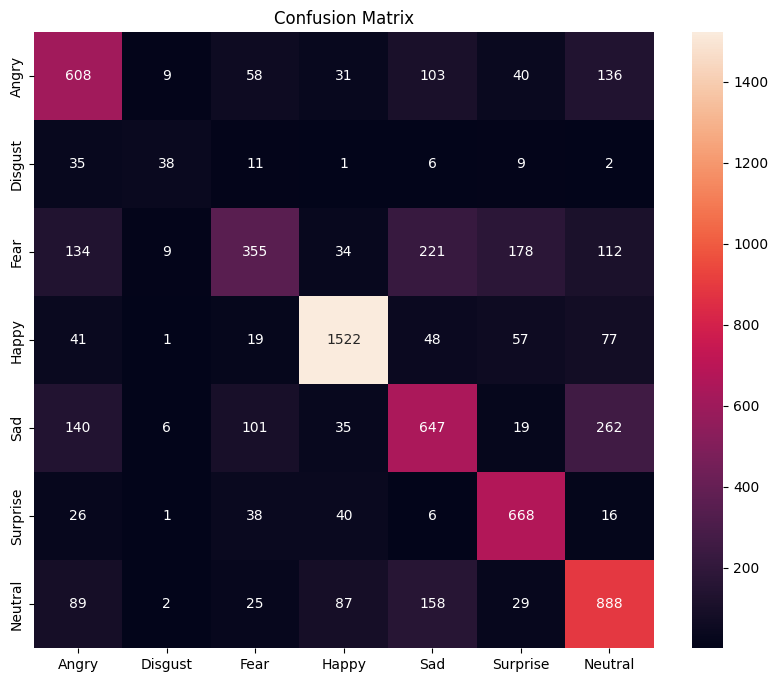

              precision    recall  f1-score   support

       Angry       0.57      0.62      0.59       985
     Disgust       0.58      0.37      0.45       102
        Fear       0.58      0.34      0.43      1043
       Happy       0.87      0.86      0.87      1765
         Sad       0.54      0.53      0.54      1210
    Surprise       0.67      0.84      0.74       795
     Neutral       0.59      0.69      0.64      1278

    accuracy                           0.66      7178
   macro avg       0.63      0.61      0.61      7178
weighted avg       0.66      0.66      0.65      7178

Epoch 44:
Train Loss: 1.1945 | Acc: 0.6366
Val Loss: 1.2974 | Acc: 0.6584


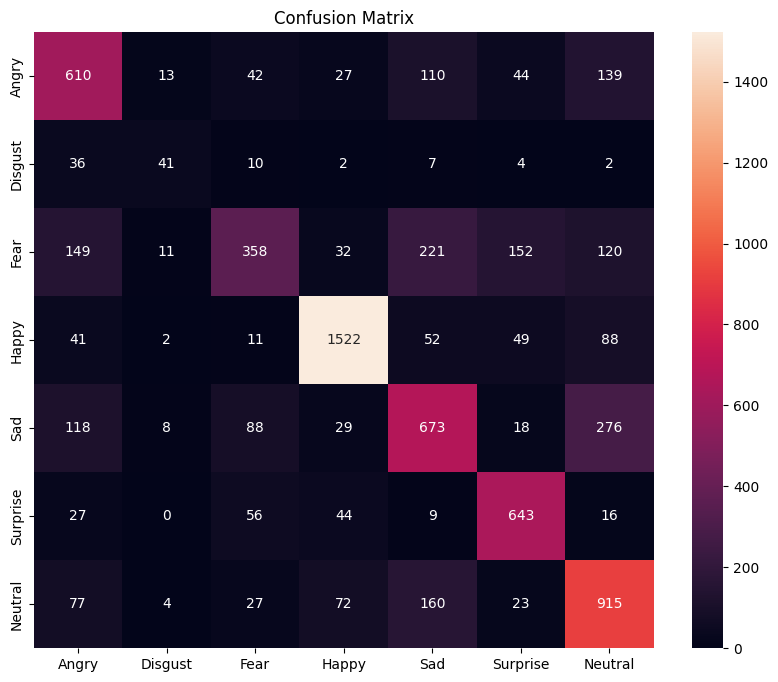

              precision    recall  f1-score   support

       Angry       0.58      0.62      0.60       985
     Disgust       0.52      0.40      0.45       102
        Fear       0.60      0.34      0.44      1043
       Happy       0.88      0.86      0.87      1765
         Sad       0.55      0.56      0.55      1210
    Surprise       0.69      0.81      0.74       795
     Neutral       0.59      0.72      0.65      1278

    accuracy                           0.66      7178
   macro avg       0.63      0.62      0.61      7178
weighted avg       0.66      0.66      0.66      7178

Epoch 45:
Train Loss: 1.1941 | Acc: 0.6350
Val Loss: 1.2676 | Acc: 0.6634


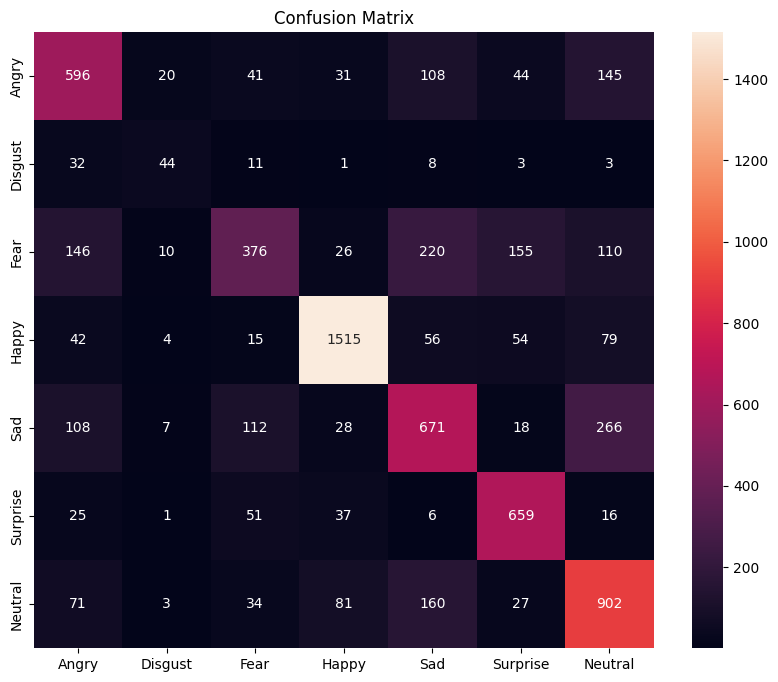

              precision    recall  f1-score   support

       Angry       0.58      0.61      0.59       985
     Disgust       0.49      0.43      0.46       102
        Fear       0.59      0.36      0.45      1043
       Happy       0.88      0.86      0.87      1765
         Sad       0.55      0.55      0.55      1210
    Surprise       0.69      0.83      0.75       795
     Neutral       0.59      0.71      0.64      1278

    accuracy                           0.66      7178
   macro avg       0.62      0.62      0.62      7178
weighted avg       0.66      0.66      0.66      7178

Epoch 46:
Train Loss: 1.1903 | Acc: 0.6364
Val Loss: 1.2862 | Acc: 0.6636


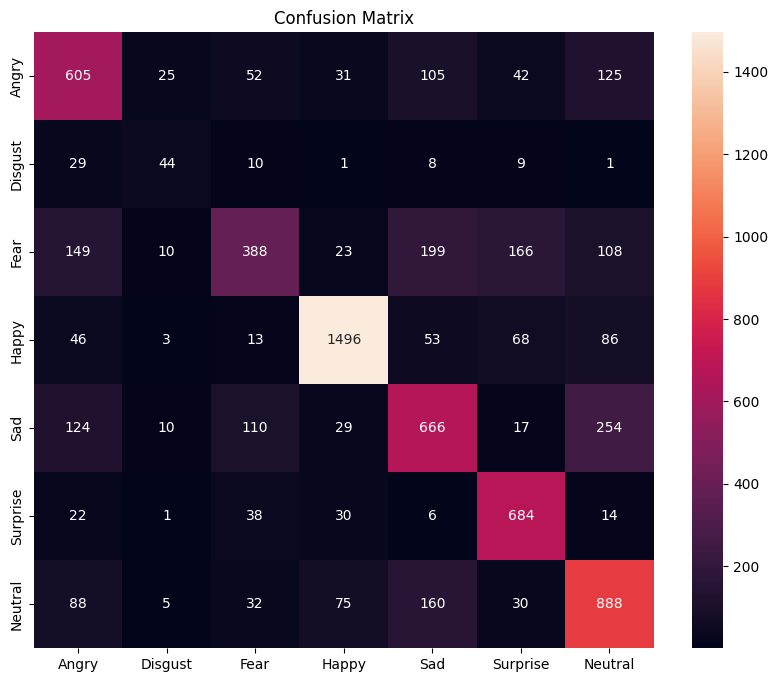

              precision    recall  f1-score   support

       Angry       0.57      0.61      0.59       985
     Disgust       0.45      0.43      0.44       102
        Fear       0.60      0.37      0.46      1043
       Happy       0.89      0.85      0.87      1765
         Sad       0.56      0.55      0.55      1210
    Surprise       0.67      0.86      0.76       795
     Neutral       0.60      0.69      0.64      1278

    accuracy                           0.66      7178
   macro avg       0.62      0.62      0.62      7178
weighted avg       0.67      0.66      0.66      7178

Epoch 47:
Train Loss: 1.1924 | Acc: 0.6347
Val Loss: 1.2742 | Acc: 0.6647


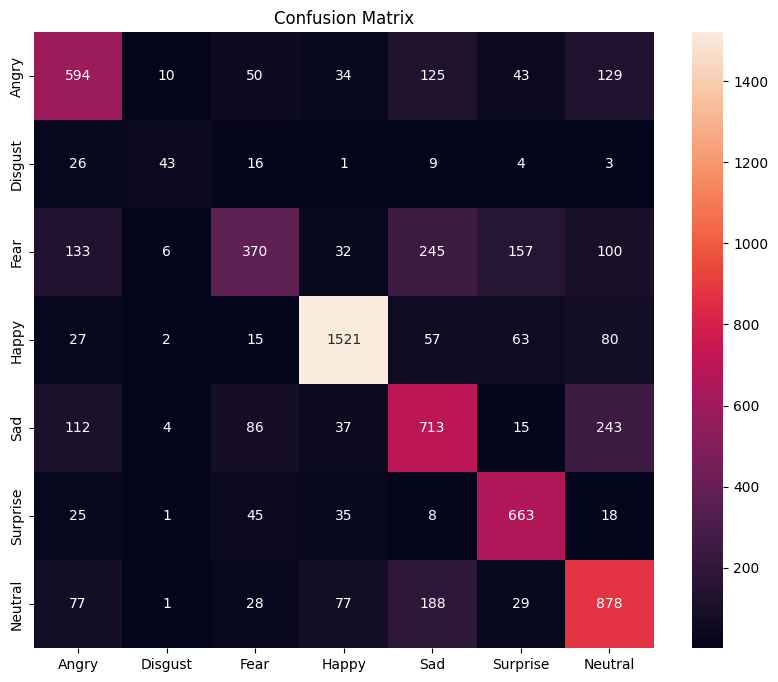

              precision    recall  f1-score   support

       Angry       0.60      0.60      0.60       985
     Disgust       0.64      0.42      0.51       102
        Fear       0.61      0.35      0.45      1043
       Happy       0.88      0.86      0.87      1765
         Sad       0.53      0.59      0.56      1210
    Surprise       0.68      0.83      0.75       795
     Neutral       0.61      0.69      0.64      1278

    accuracy                           0.67      7178
   macro avg       0.65      0.62      0.63      7178
weighted avg       0.67      0.67      0.66      7178

Epoch 48:
Train Loss: 1.1904 | Acc: 0.6365
Val Loss: 1.2599 | Acc: 0.6662


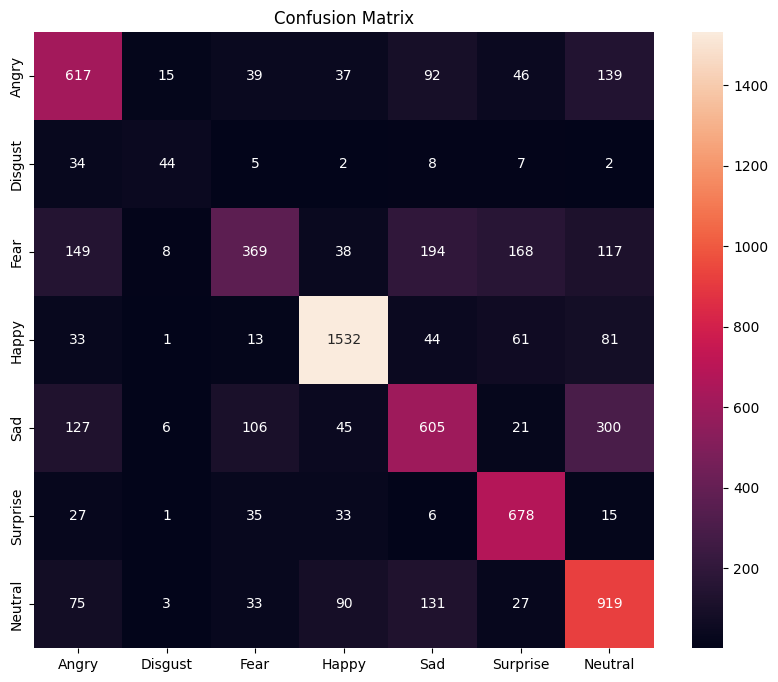

              precision    recall  f1-score   support

       Angry       0.58      0.63      0.60       985
     Disgust       0.56      0.43      0.49       102
        Fear       0.61      0.35      0.45      1043
       Happy       0.86      0.87      0.87      1765
         Sad       0.56      0.50      0.53      1210
    Surprise       0.67      0.85      0.75       795
     Neutral       0.58      0.72      0.64      1278

    accuracy                           0.66      7178
   macro avg       0.63      0.62      0.62      7178
weighted avg       0.66      0.66      0.65      7178

Epoch 49:
Train Loss: 1.1842 | Acc: 0.6383
Val Loss: 1.2889 | Acc: 0.6637


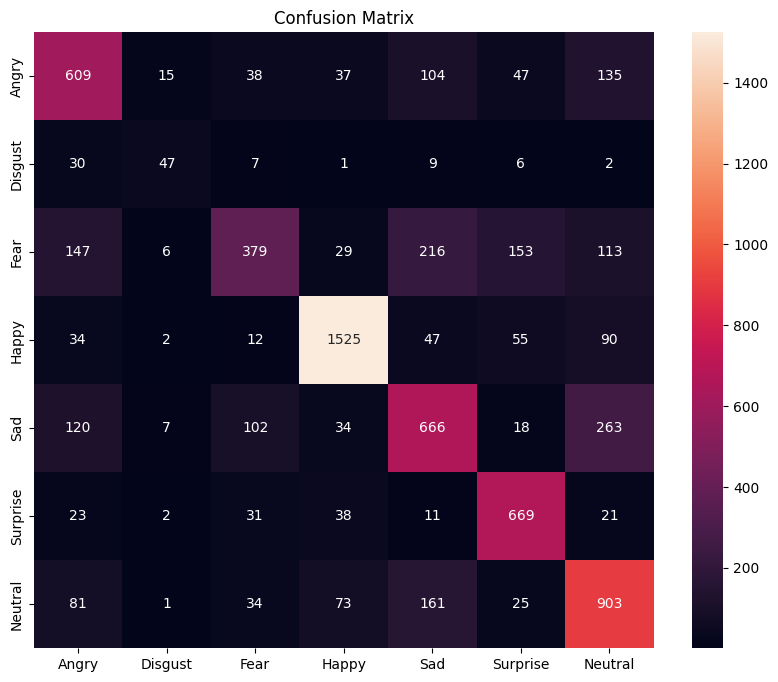

              precision    recall  f1-score   support

       Angry       0.58      0.62      0.60       985
     Disgust       0.59      0.46      0.52       102
        Fear       0.63      0.36      0.46      1043
       Happy       0.88      0.86      0.87      1765
         Sad       0.55      0.55      0.55      1210
    Surprise       0.69      0.84      0.76       795
     Neutral       0.59      0.71      0.64      1278

    accuracy                           0.67      7178
   macro avg       0.64      0.63      0.63      7178
weighted avg       0.67      0.67      0.66      7178

Epoch 50:
Train Loss: 1.1836 | Acc: 0.6401
Val Loss: 1.2779 | Acc: 0.6684


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,███████████████████████████████▁▁▁▁▁▁▁▁▁
train_acc,▁▃▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████
train_loss,█▆▅▅▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▃▅▅▅▆▅▆▆▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇████████████
val_loss,█▆▅▅▆▆▅▅▄▅▄▃▃▃▃▃▃▃▂▃▃▂▂▂▂▂▂▃▂▂▂▁▂▂▁▁▁▁▁▁
epoch,49
lr,0.0005
train_acc,0.64011
train_loss,1.18364
val_acc,0.66843


Best Validation Accuracy: 0.6684


In [26]:
## 5. Main Training Execution

from PIL import Image
best_acc = 0
patience = 5
no_improve = 0

for epoch in range(50):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)

    scheduler.step(val_acc)

    # Log to W&B
    wandb.log({
        'epoch': epoch,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'val_loss': val_loss,
        'val_acc': val_acc,
        'lr': optimizer.param_groups[0]['lr']
    })

    # Early stopping
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'best_dropout_model.pth')
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

wandb.finish()
print(f"Best Validation Accuracy: {best_acc:.4f}")